<a href="https://colab.research.google.com/github/fakoliba/Personal-Loan-Campaign/blob/main/Personal_Loan_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
import imblearn
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore')

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

data = pd.read_csv('/content/drive/MyDrive/class/data/Loan_Modelling.csv')

## Data Overview

* Observations
* Sanity checks

In [ ]:
#Sampling the data
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
#Sampling the data
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [ ]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset has 5000 rows and 14 columns.


In [ ]:
#Checking for duplicates
data.duplicated().sum()

0

In [ ]:
#Checking the Statistical Summary
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [ ]:
#Check the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#Dropping columns ID
data.drop('ID',axis=1,inplace=True)

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

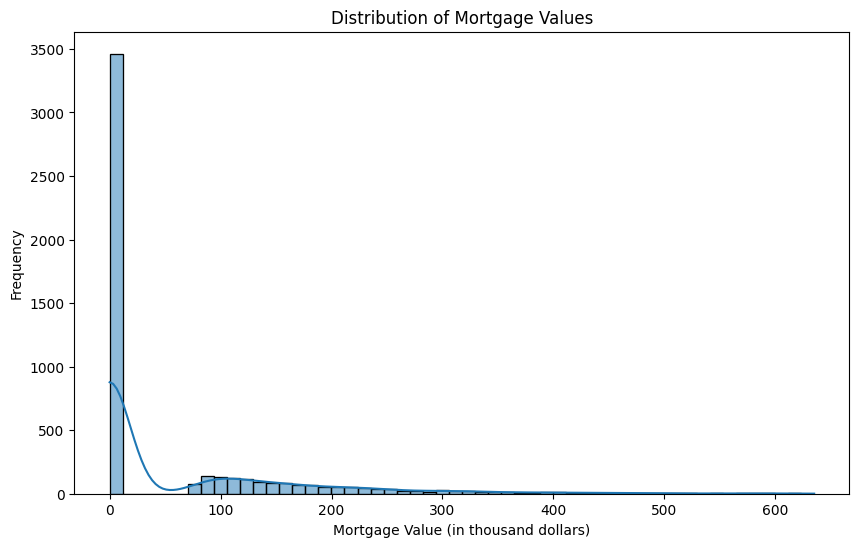

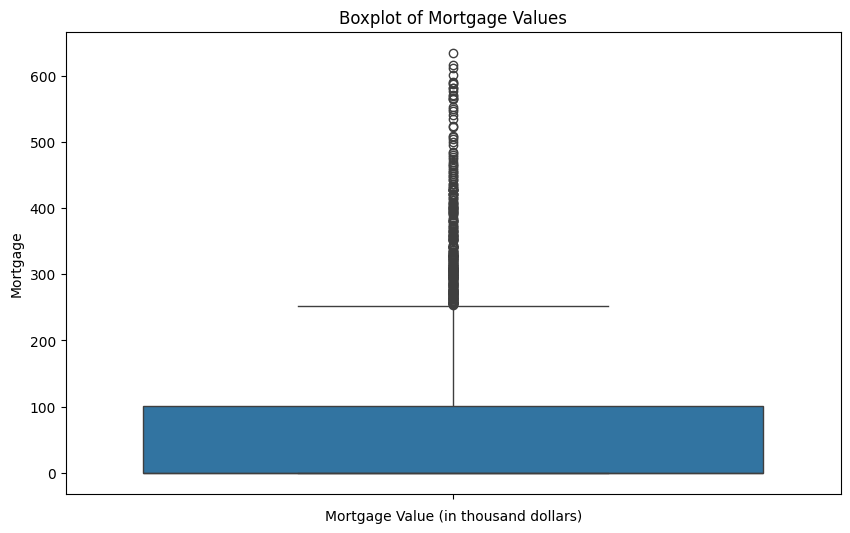

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64


In [ ]:
# Distribution of Mortgage attribute
plt.figure(figsize=(10, 6))
sns.histplot(data['Mortgage'], kde=True)
plt.title('Distribution of Mortgage Values')
plt.xlabel('Mortgage Value (in thousand dollars)')
plt.ylabel('Frequency')
plt.show()

# Checking for outliers in Mortgage attribute
plt.figure(figsize=(10, 6))
sns.boxplot(data['Mortgage'])
plt.title('Boxplot of Mortgage Values')
plt.xlabel('Mortgage Value (in thousand dollars)')
plt.show()

print(data['Mortgage'].describe())


In [ ]:
#Insights from the Mortgage Distribution and Boxplot:

# Distribution:
# - The distribution of mortgage values is heavily right-skewed, indicating that a majority of customers have either no mortgage or relatively small mortgages.
# - There's a long tail towards higher mortgage values, suggesting the presence of some customers with substantial mortgages.

# Outliers:
# - The boxplot confirms the presence of outliers, represented by the individual points beyond the whiskers of the box.
# - These outliers represent customers with exceptionally high mortgage values compared to the majority.

# Potential Implications:
# - The skewed distribution and outliers in mortgage values could impact model performance.
# - It might be necessary to consider techniques to handle these outliers, such as transformation or removal, depending on their nature and impact on the analysis.
# - The concentration of customers with low or no mortgages suggests that targeting strategies might need to be tailored for different mortgage segments.


In [ ]:
# Customers with credit cards
num_credit_card_holders = data['CreditCard'].sum()
print("Number of customers with credit cards:", num_credit_card_holders)


Number of customers with credit cards: 1470


Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode              -0.002974
Experience           -0.007413
Age                  -0.007726
Name: Personal_Loan, dtype: float64


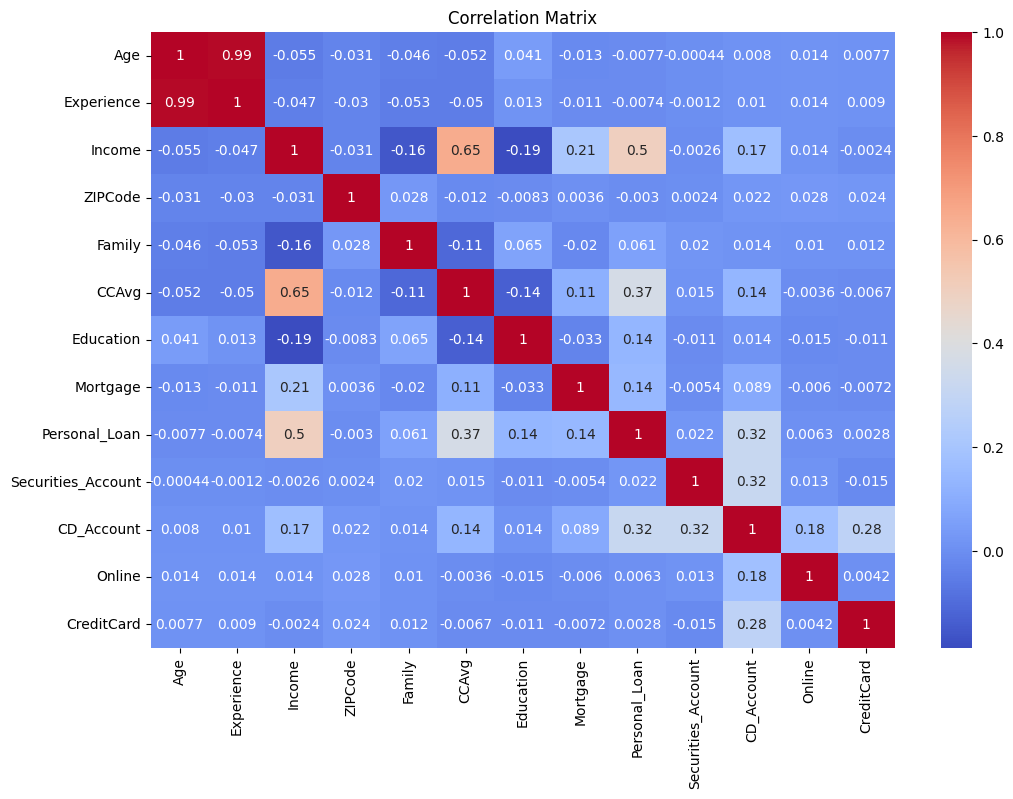

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the correlations with the target attribute 'Personal_Loan'
personal_loan_correlations = correlation_matrix['Personal_Loan'].sort_values(ascending=False)

# Print the correlations
print(personal_loan_correlations)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Insights from the Correlation Analysis:

# Strongest Positive Correlations:
# - Income: There's a strong positive correlation between income and the likelihood of taking a personal loan. Higher-income individuals are more likely to be interested in loans.
# - CCAvg: Average credit card spending also shows a strong positive correlation. Those who spend more on credit cards might be more open to taking loans.

# Moderate Positive Correlations:
# - CD_Account: Customers with a Certificate of Deposit (CD) account show a moderate positive correlation with loan interest.

# Weak Correlations:
# - Age, Experience, Family, Mortgage, Securities_Account, Online, and CreditCard show weak correlations with personal loan interest, suggesting they might not be strong predictors on their own.

# Potential Implications for Targeting:
# - Focusing on customers with higher incomes and higher credit card spending could be an effective strategy.
# - Exploring ways to leverage the existing CD account customer base for loan offers might yield positive results.



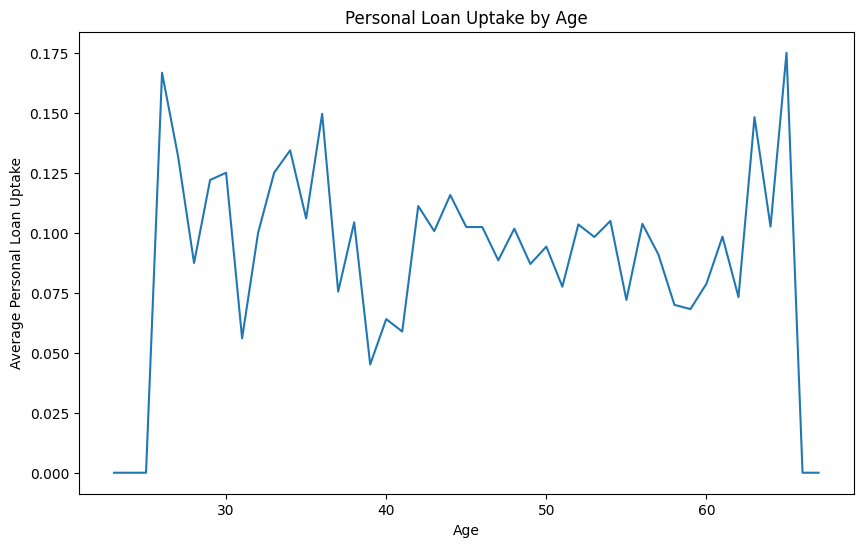

In [ ]:
# Group the data by age and calculate the average personal loan uptake
loan_by_age = data.groupby('Age')['Personal_Loan'].mean().reset_index()

# Create a line plot to visualize the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Personal_Loan', data=loan_by_age)
plt.title('Personal Loan Uptake by Age')
plt.xlabel('Age')
plt.ylabel('Average Personal Loan Uptake')
plt.show()


In [ ]:
# Insights from the Personal Loan Uptake by Age graph:

# No Clear Trend:
# - The line plot doesn't reveal a strong linear relationship between age and personal loan uptake.
# - There's no consistent increase or decrease in loan interest as age increases.

# Fluctuations:
# - There are noticeable fluctuations in loan uptake across different age groups.
# - Certain age ranges show slightly higher or lower interest compared to others.

# Potential Implications:
# - Age alone might not be a reliable predictor of personal loan interest.
# - Targeting strategies based solely on age might not be effective.



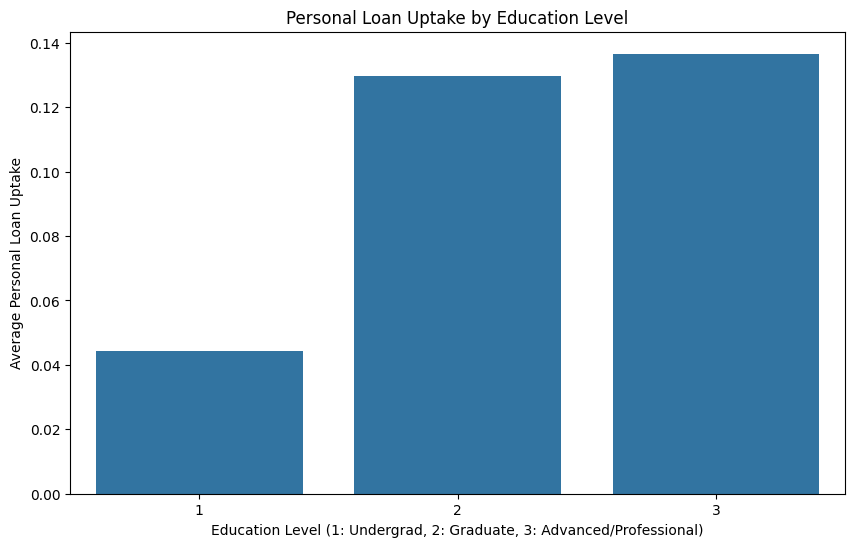

In [ ]:
# Group the data by education and calculate the average personal loan uptake
loan_by_education = data.groupby('Education')['Personal_Loan'].mean().reset_index()

# Create a bar plot to visualize the trend
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Personal_Loan', data=loan_by_education)
plt.title('Personal Loan Uptake by Education Level')
plt.xlabel('Education Level (1: Undergrad, 2: Graduate, 3: Advanced/Professional)')
plt.ylabel('Average Personal Loan Uptake')
plt.show()

# Insights from the Personal Loan Uptake by Education Level:

# Clear Trend:
# - The bar plot shows a clear trend of increasing personal loan uptake with higher education levels.
# - Customers with advanced/professional degrees are significantly more likely to be interested in loans compared to those with undergraduate or graduate degrees.

# Potential Implications:
# - Education level appears to be a strong predictor of personal loan interest.
# - Targeting customers with higher education levels, particularly those with advanced/professional degrees, could be a highly effective strategy.


In [ ]:
# Insights from the Personal Loan Uptake by Education Level:

# Clear Trend:
# - The bar plot shows a clear trend of increasing personal loan uptake with higher education levels.
# - Customers with advanced/professional degrees are significantly more likely to be interested in loans compared to those with undergraduate or graduate degrees.

# Potential Implications:
# - Education level appears to be a strong predictor of personal loan interest.
# - Targeting customers with higher education levels, particularly those with advanced/professional degrees, could be a highly effective strategy.


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# prompt: Missing value treatment

# Checking for missing values
data.isnull().sum()


Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

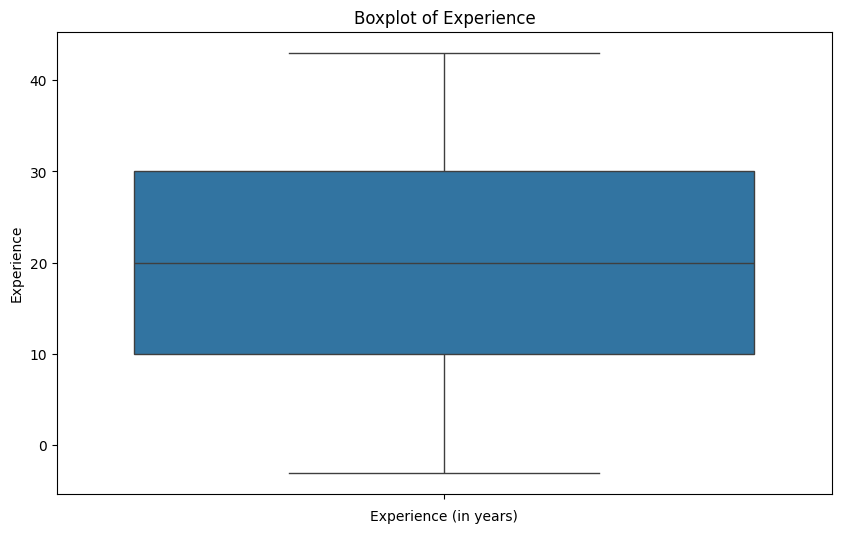

      Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
89     25          -1     113    94303       4   2.30          3         0   
226    24          -1      39    94085       2   1.70          2         0   
315    24          -2      51    90630       3   0.30          3         0   
451    28          -2      48    94132       2   1.75          3        89   
524    24          -1      75    93014       4   0.20          1         0   
536    25          -1      43    92173       3   2.40          2       176   
540    25          -1     109    94010       4   2.30          3       314   
576    25          -1      48    92870       3   0.30          3         0   
583    24          -1      38    95045       2   1.70          2         0   
597    24          -2     125    92835       2   7.20          1         0   
649    25          -1      82    92677       4   2.10          3         0   
670    23          -1      61    92374       4   2.60          1

In [ ]:
# Checking for anomalies in the Experience column
plt.figure(figsize=(10, 6))
sns.boxplot(data['Experience'])
plt.title('Boxplot of Experience')
plt.xlabel('Experience (in years)')
plt.show()

# Identifying rows with negative experience values
negative_experience_rows = data[data['Experience'] < 0]
print(negative_experience_rows)


In [ ]:
# Correcting negative experience values by taking their absolute values
data['Experience'] = data['Experience'].abs()

# Verifying the correction
negative_experience_rows = data[data['Experience'] < 0]
print(negative_experience_rows)


Empty DataFrame
Columns: [Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard]
Index: []


In [ ]:
# prompt: Converting the data type of categorical features to 'category'

# Converting the data type of categorical features to 'category'
categorical_features = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Personal_Loan']
for feature in categorical_features:
    data[feature] = data[feature].astype('category')

# Verifying the conversion
print(data.dtypes)

Age                      int64
Experience               int64
Income                   int64
ZIPCode                  int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_Loan         category
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
dtype: object


Univariate Analysis

```
# This is formatted as code
```



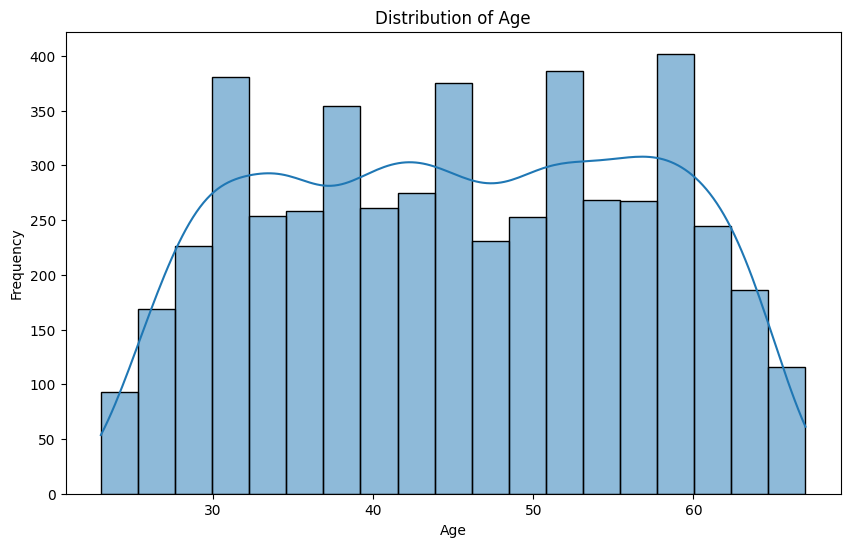

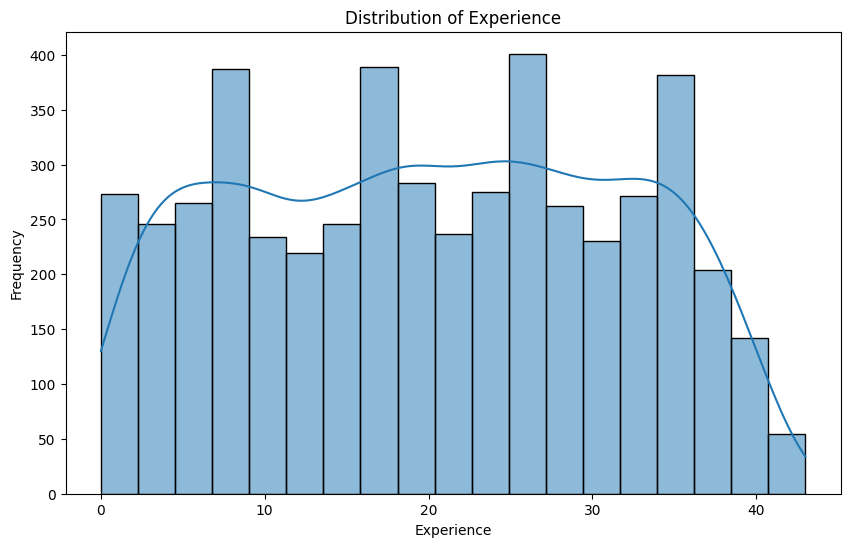

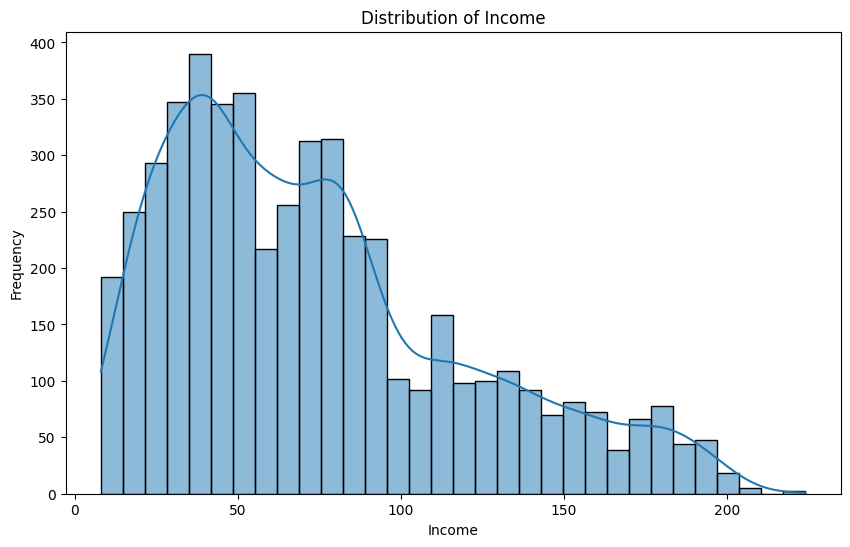

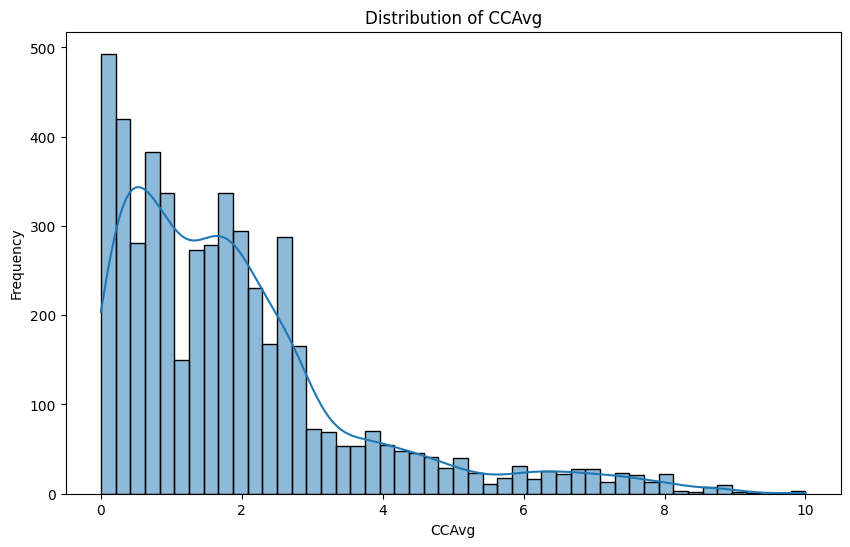

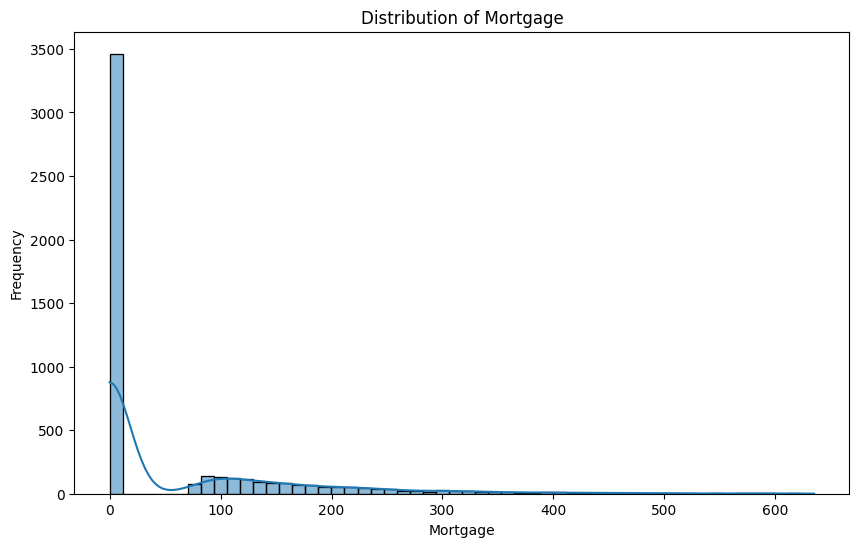

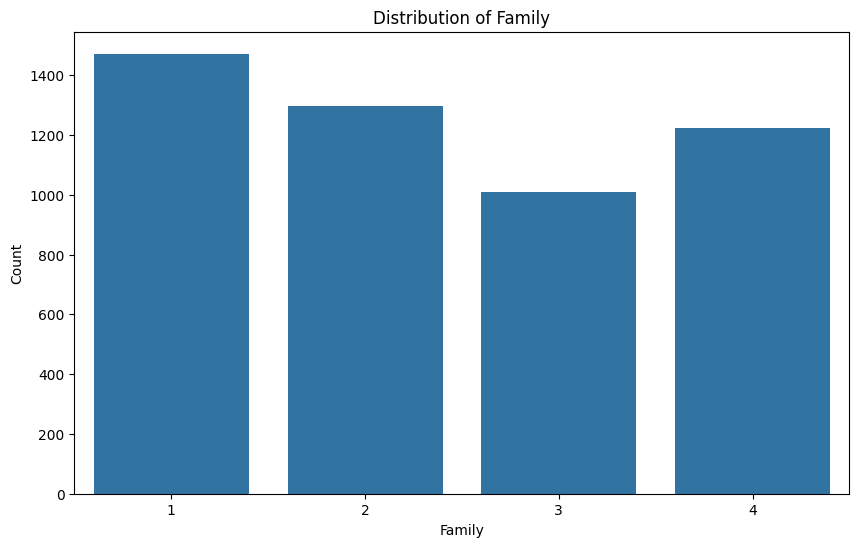

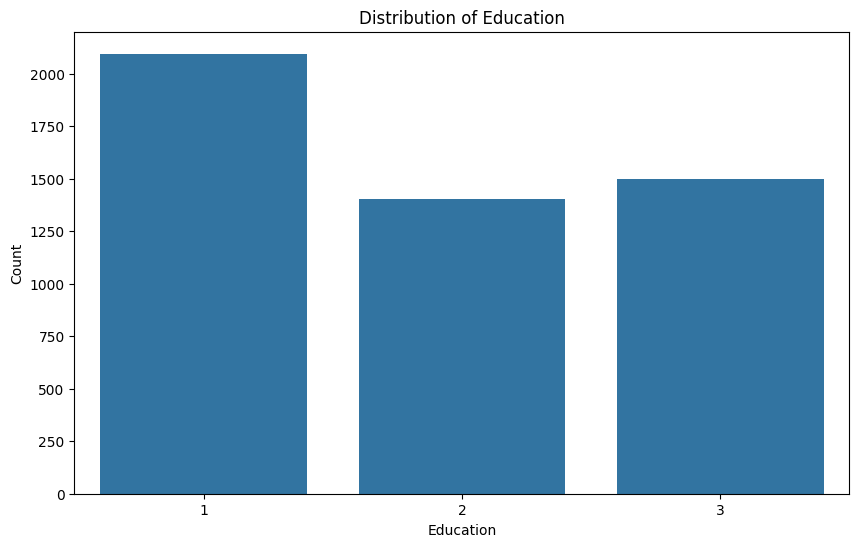

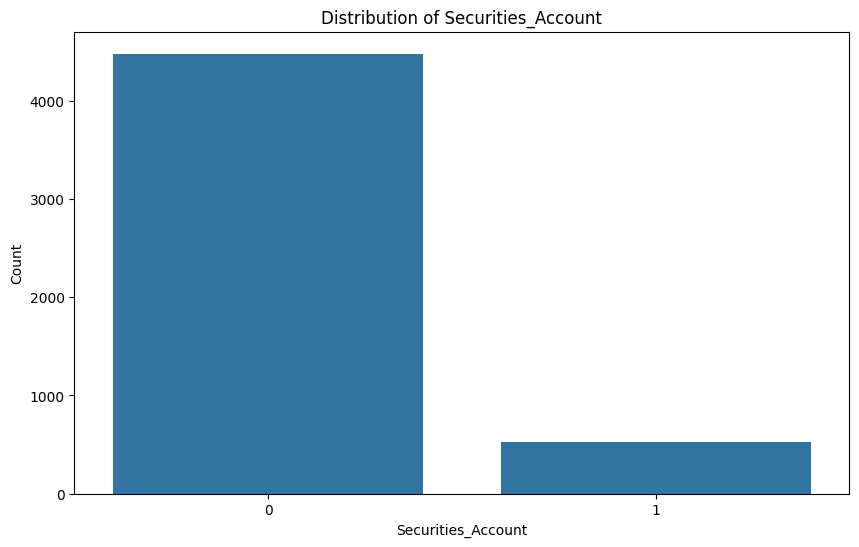

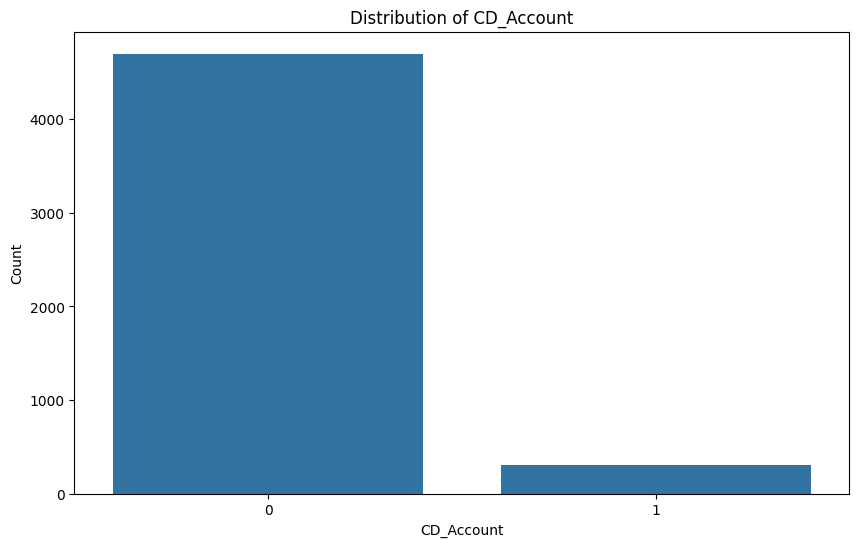

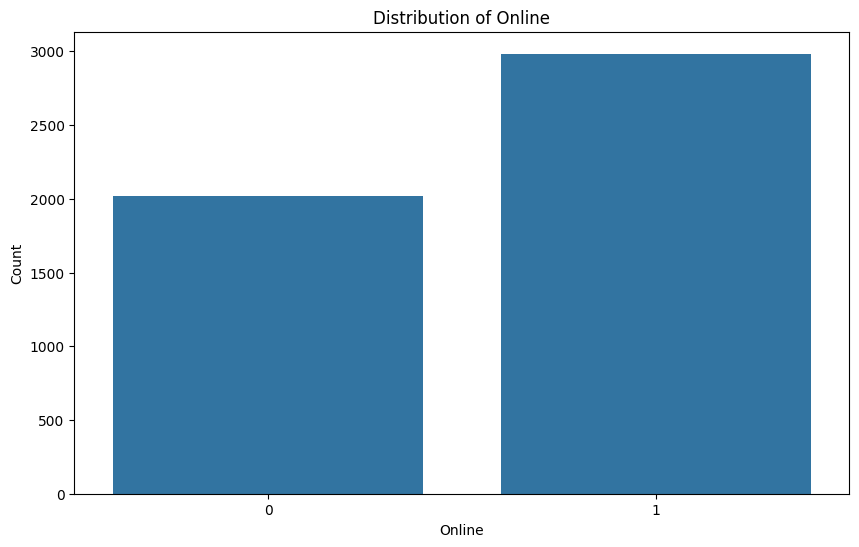

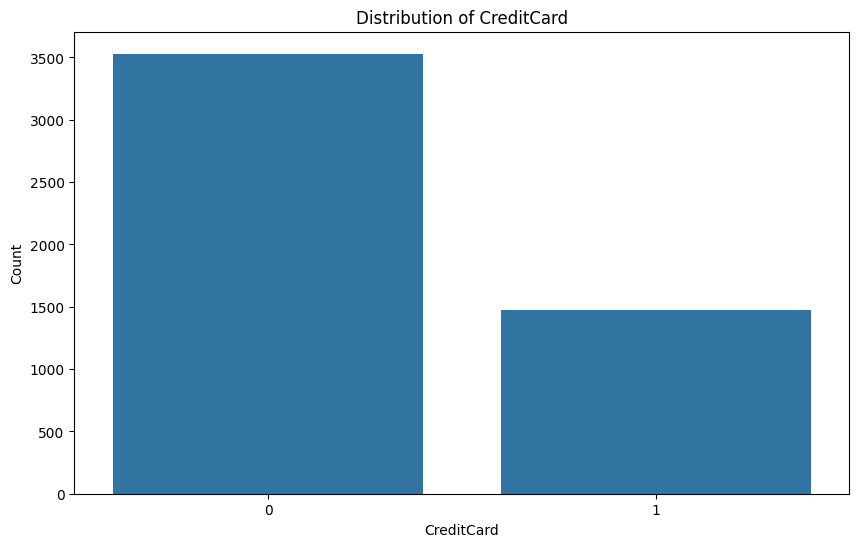

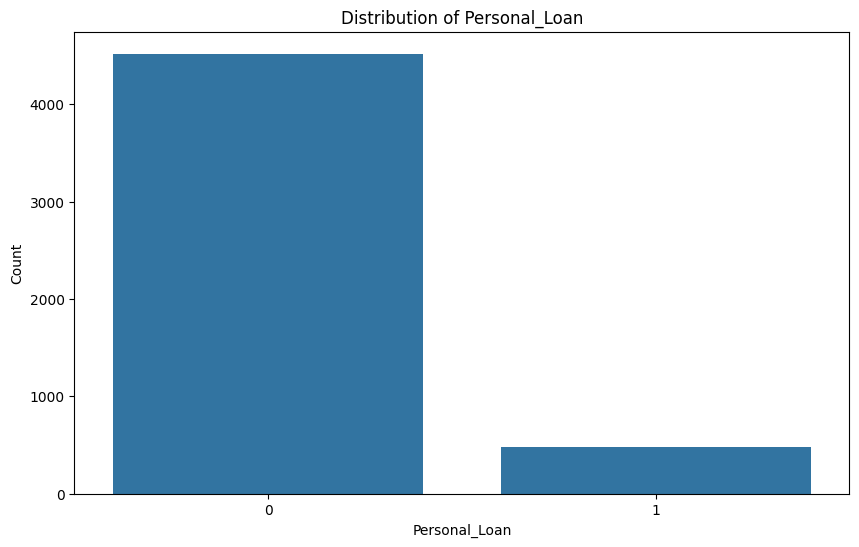

In [ ]:

# Analyzing the distribution of individual features

# Numerical Features
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Categorical Features
categorical_features = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Personal_Loan']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


In [ ]:
# Insights from Univariate Analysis:

# Numerical Features:

# Age: The distribution of age appears to be relatively uniform, with a slight peak in the mid-40s to early 50s.
# Experience: The distribution of experience is similar to age, suggesting a correlation between the two.
# Income: The distribution of income is right-skewed, indicating that a majority of customers have lower to middle incomes, with a smaller proportion having higher incomes.
# CCAvg: The distribution of average credit card spending is also right-skewed, similar to income.
# Mortgage: The distribution of mortgage values is heavily right-skewed, with a large number of customers having no mortgage or a small mortgage, and a smaller proportion having larger mortgages.

# Categorical Features:

# Family: The distribution of family size shows that most customers have a family size of 1 or 2.
# Education: The majority of customers have an undergraduate level of education, followed by graduate and then advanced/professional.
# Securities Account: A large proportion of customers do not have a securities account.
# CD Account: Similarly, a majority of customers do not have a certificate of deposit account.
# Online: Most customers use internet banking facilities.
# Credit Card: A significant proportion of customers use a credit card issued by another bank.
# Personal Loan: The target variable is imbalanced, with a significantly smaller proportion of customers having accepted a personal loan.

# These insights provide a basic understanding of the distribution of individual features and can guide further analysis and modeling decisions.


# Bivariate Analysis


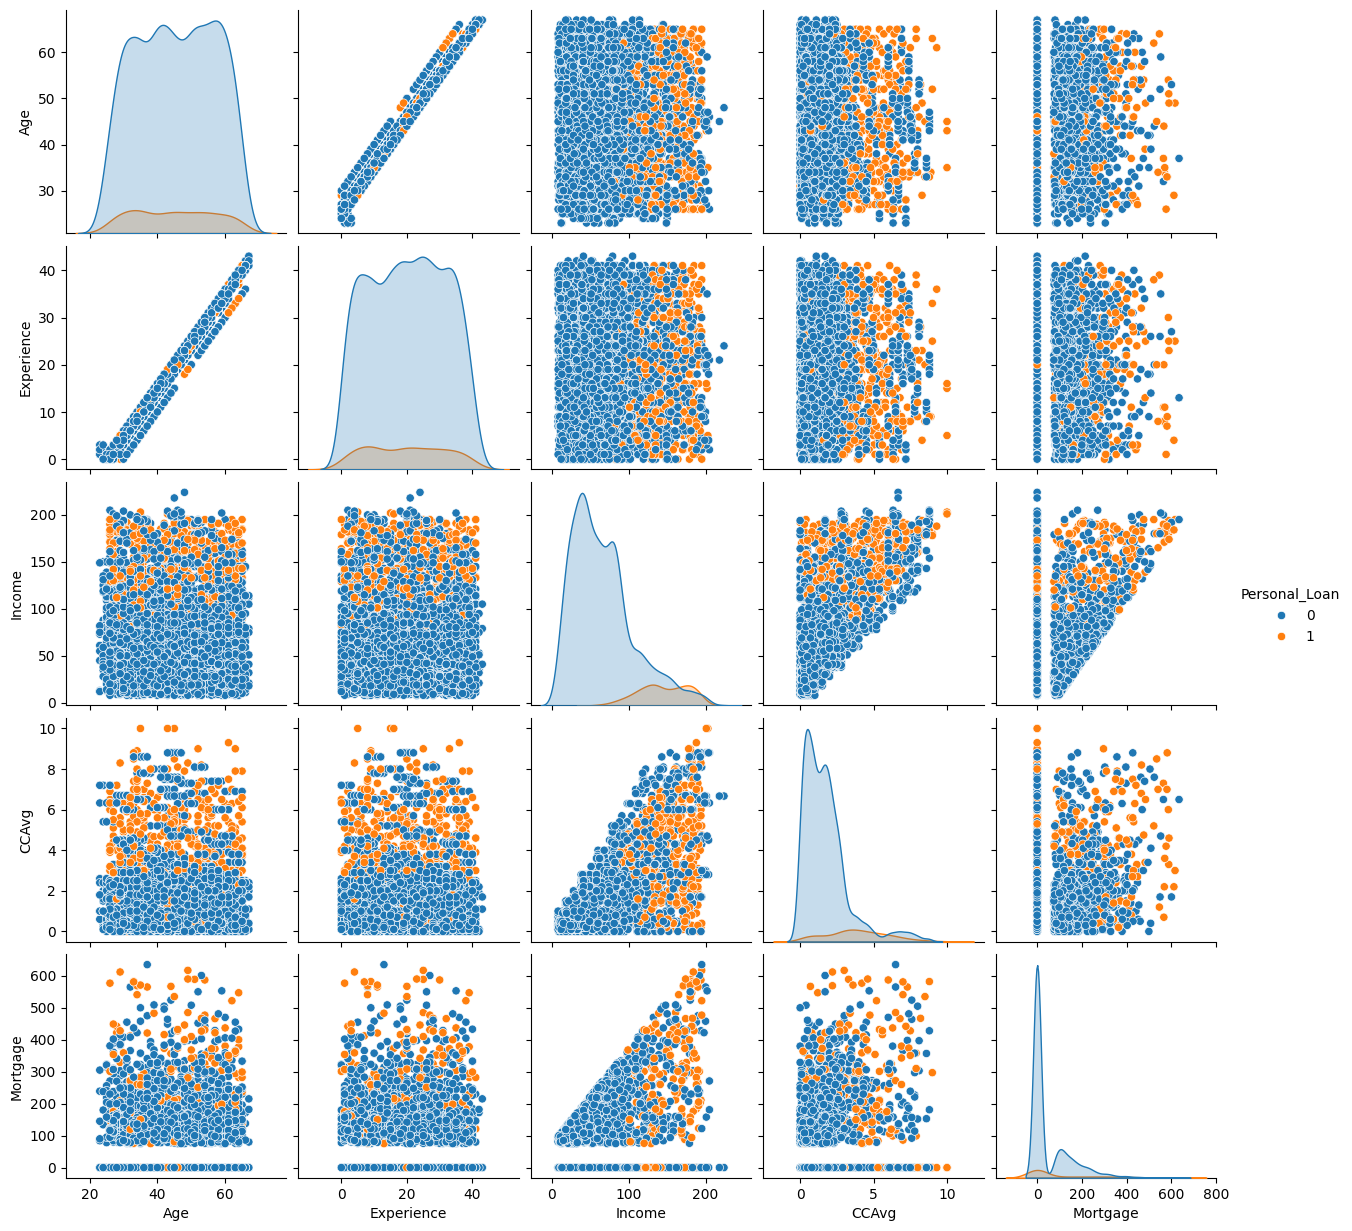

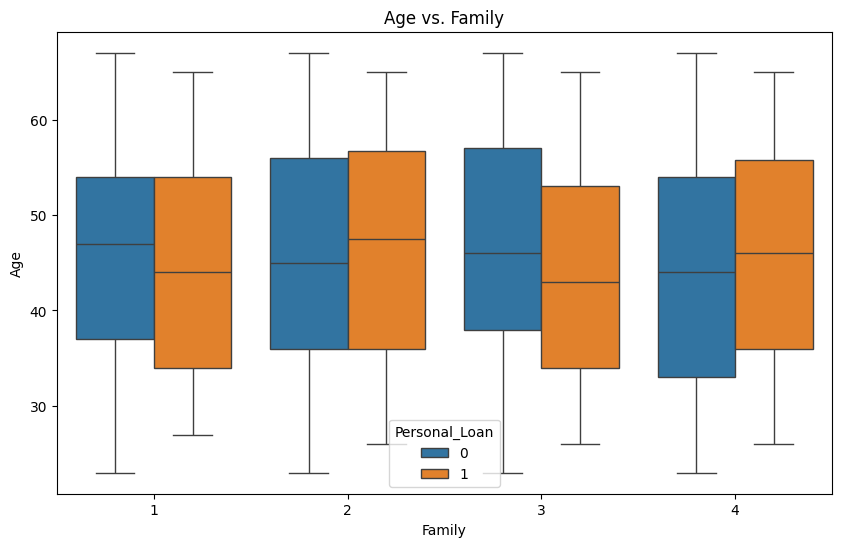

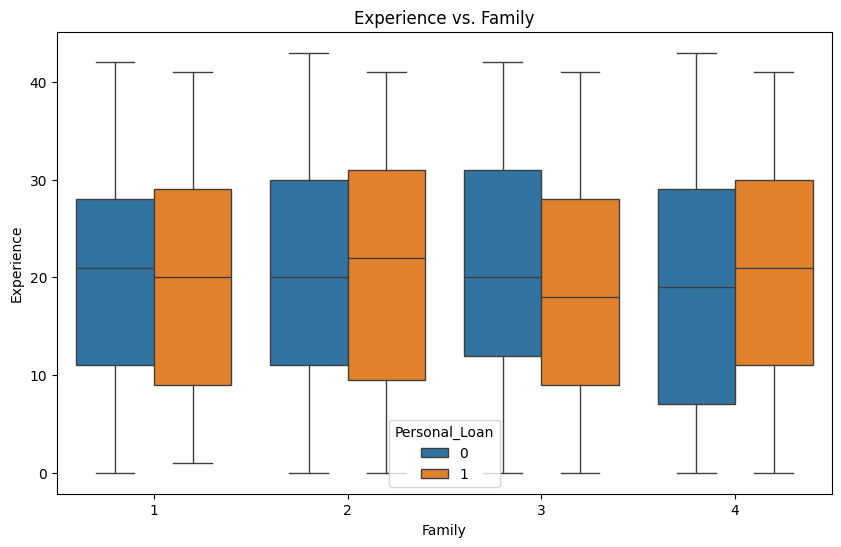

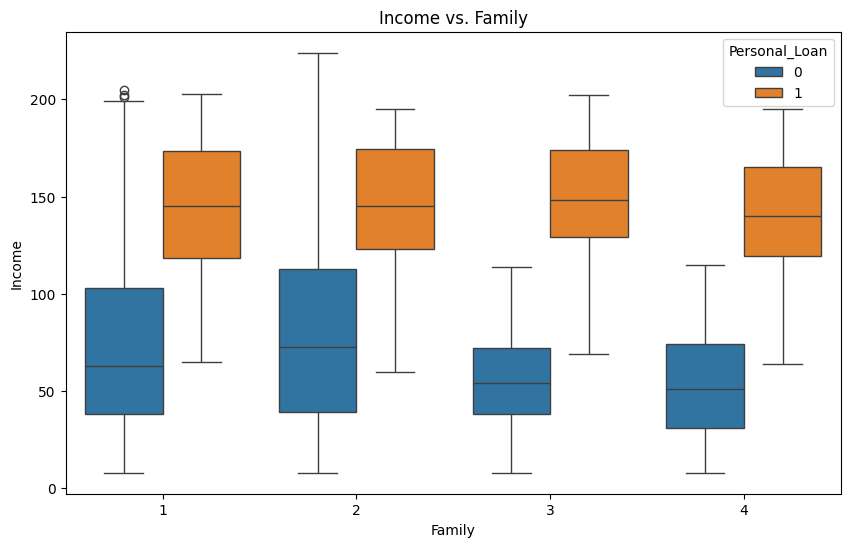

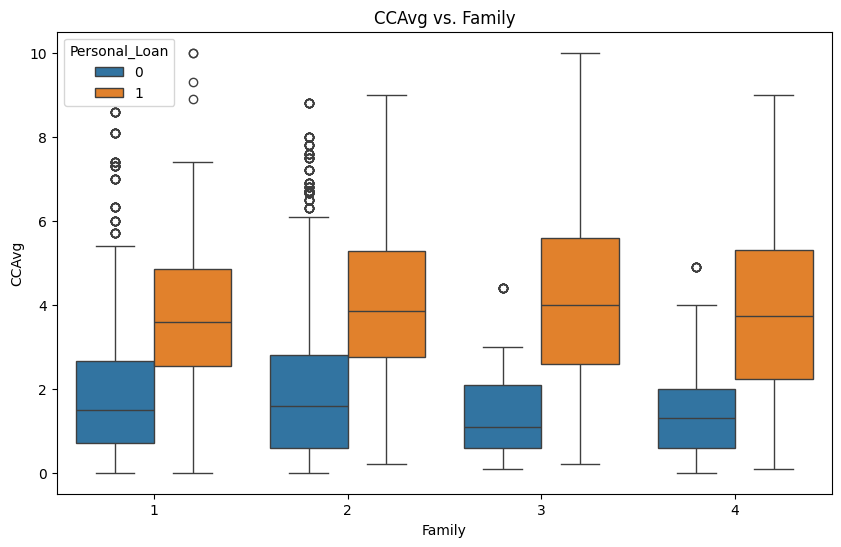

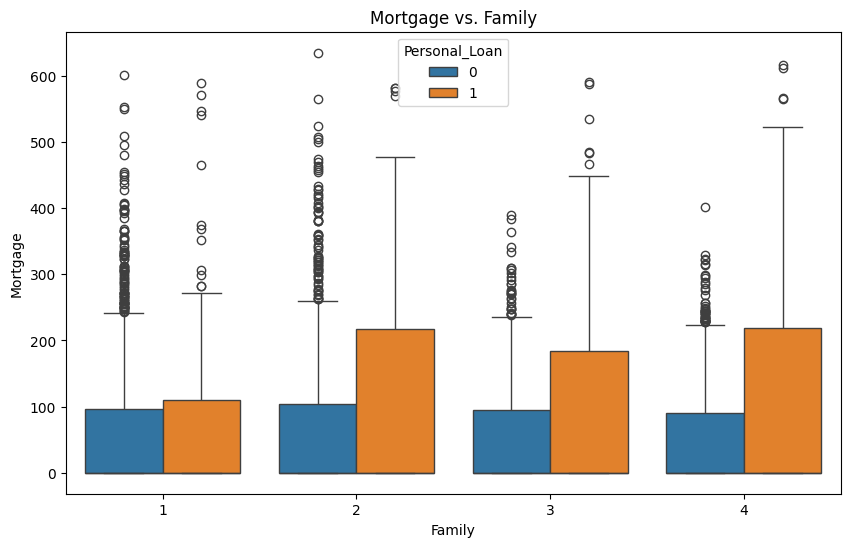

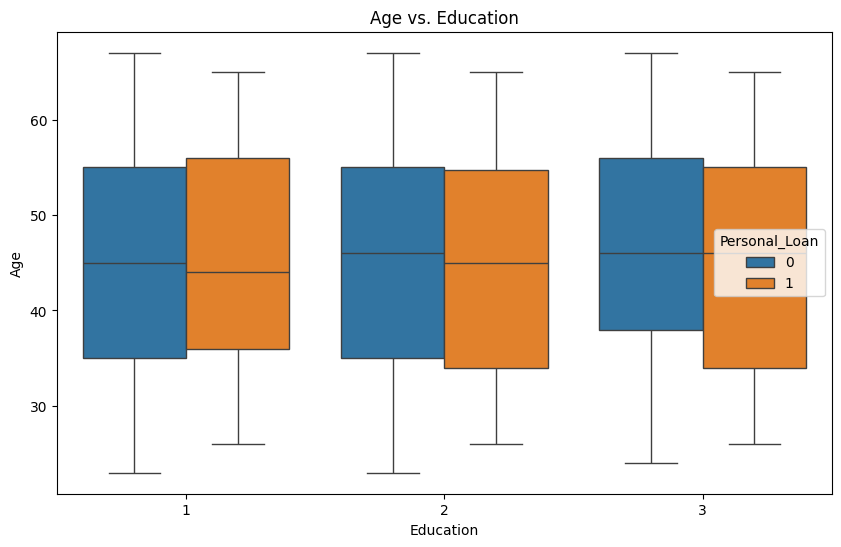

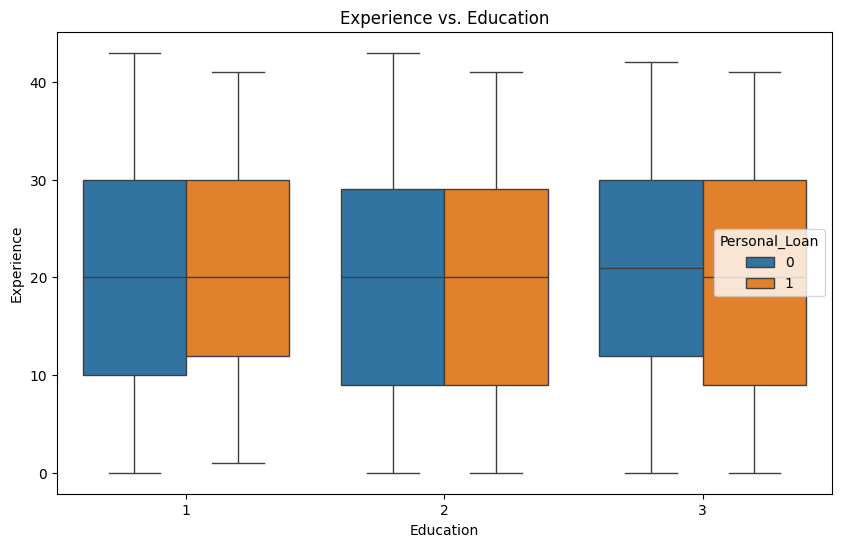

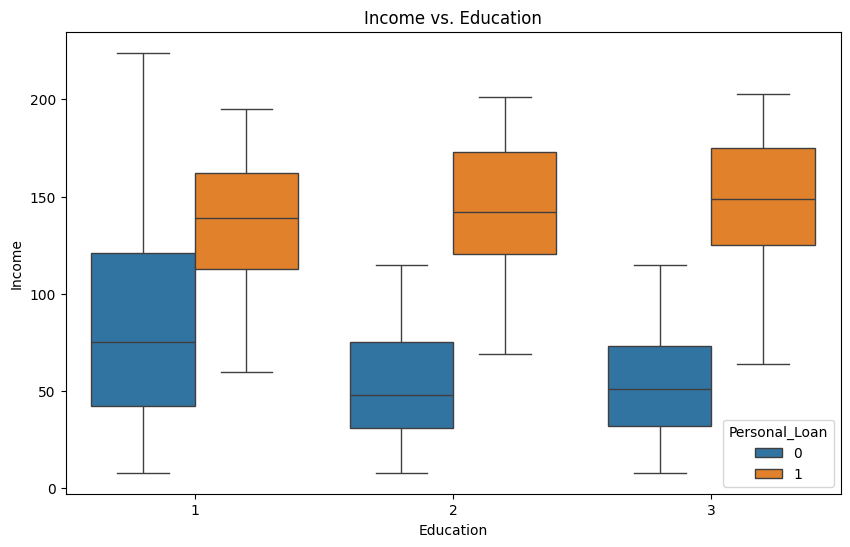

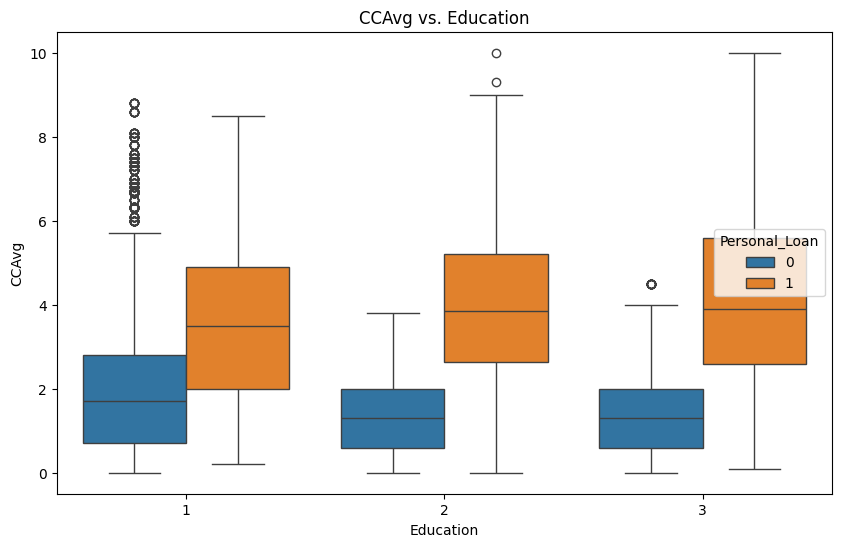

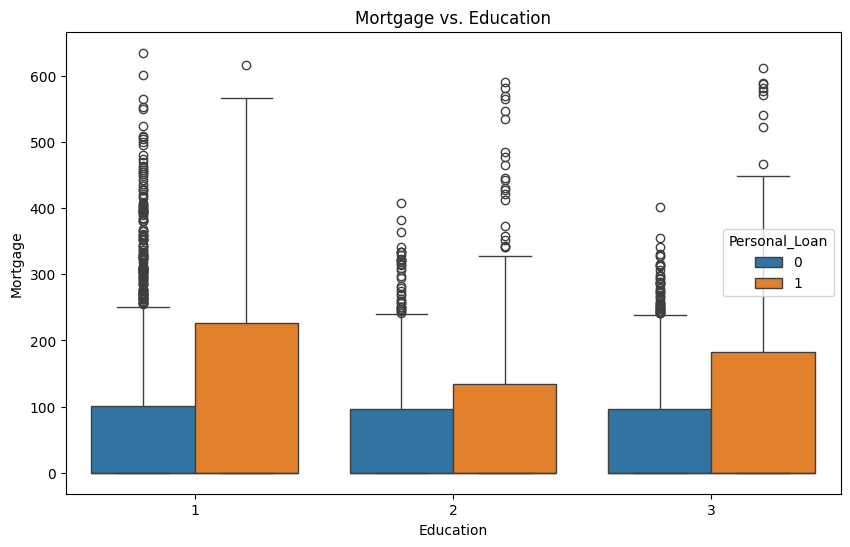

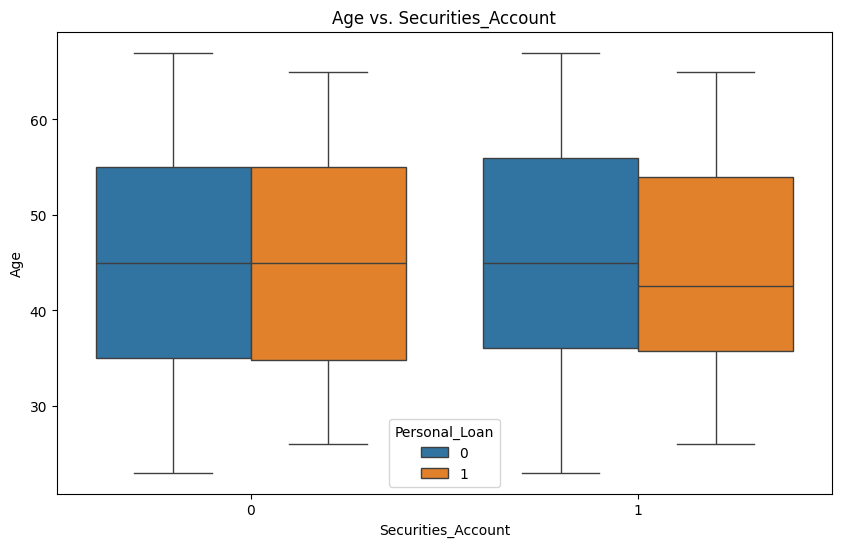

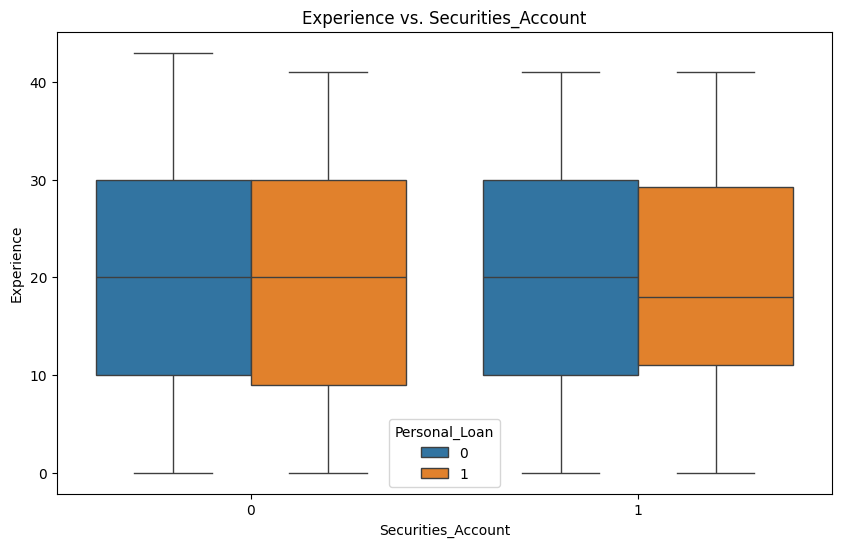

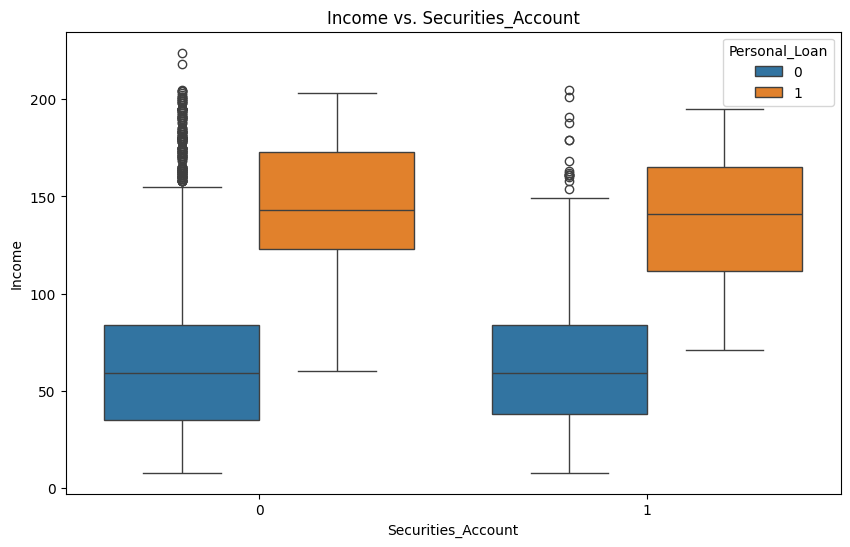

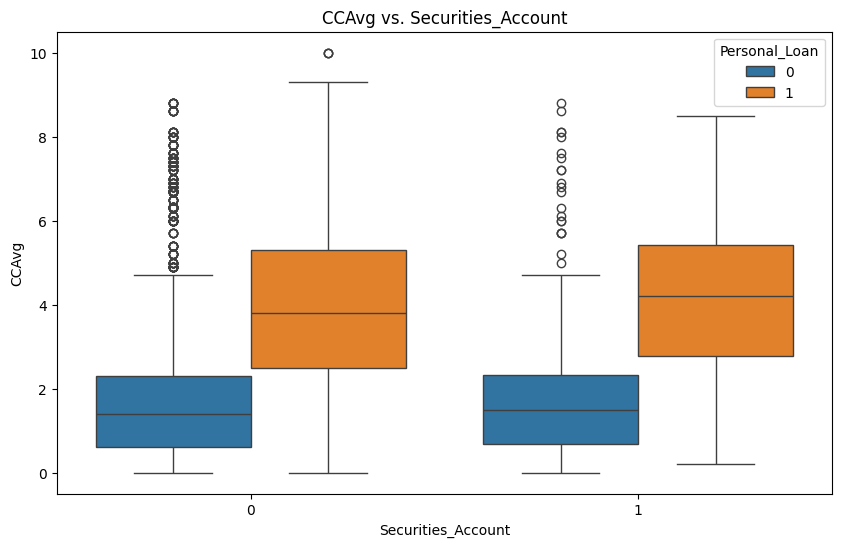

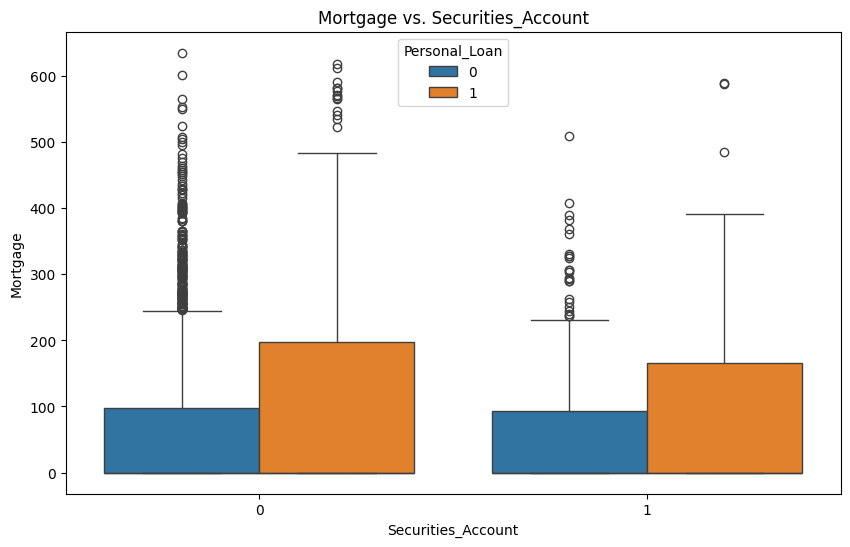

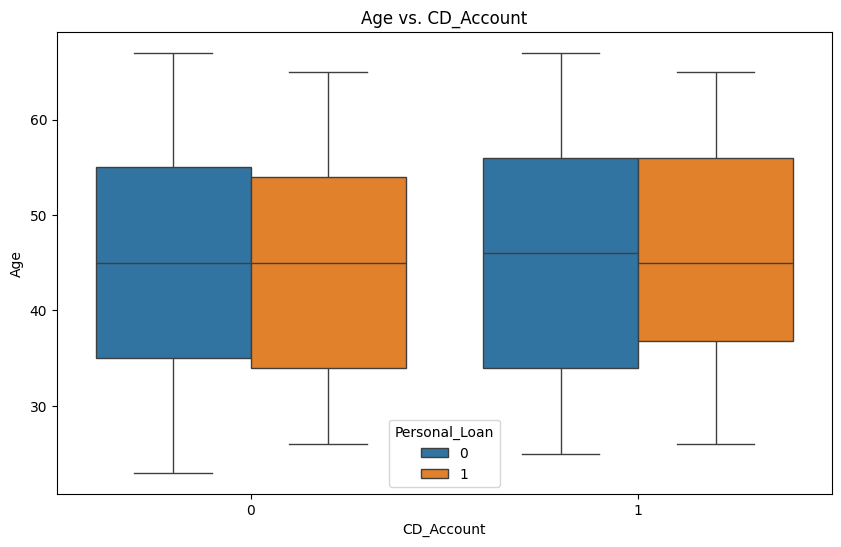

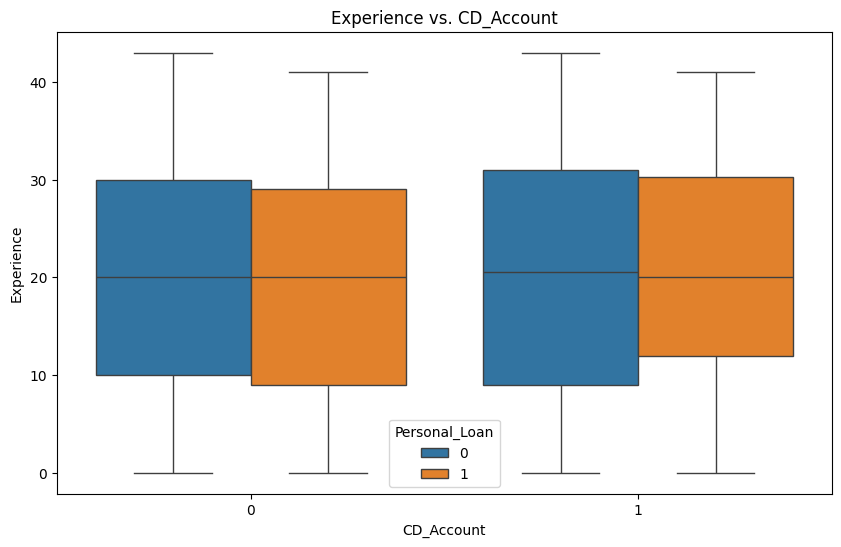

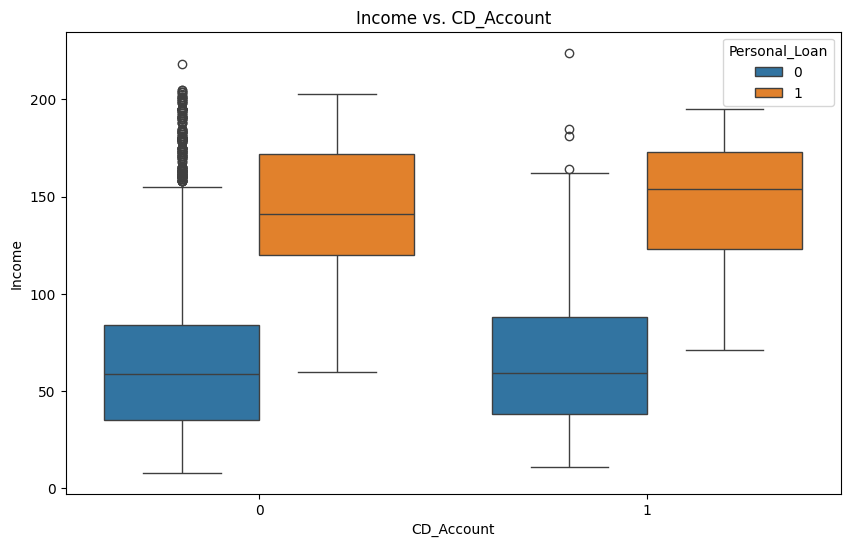

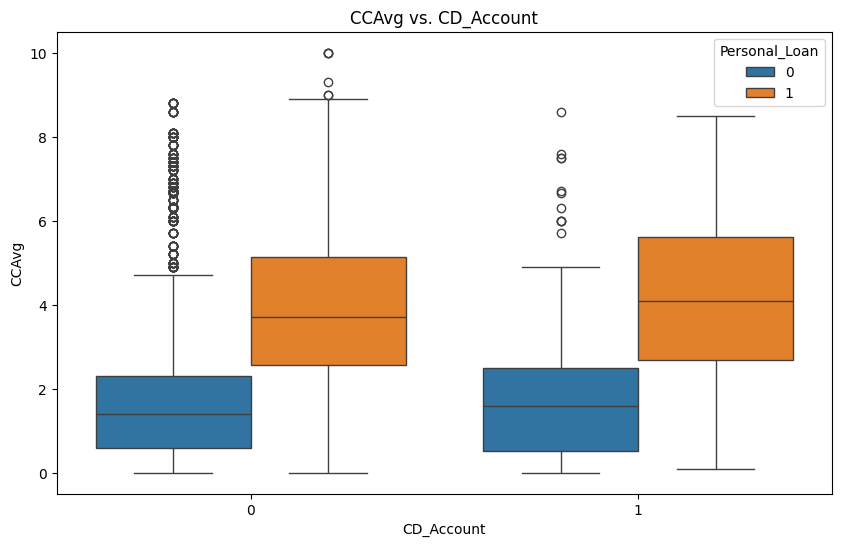

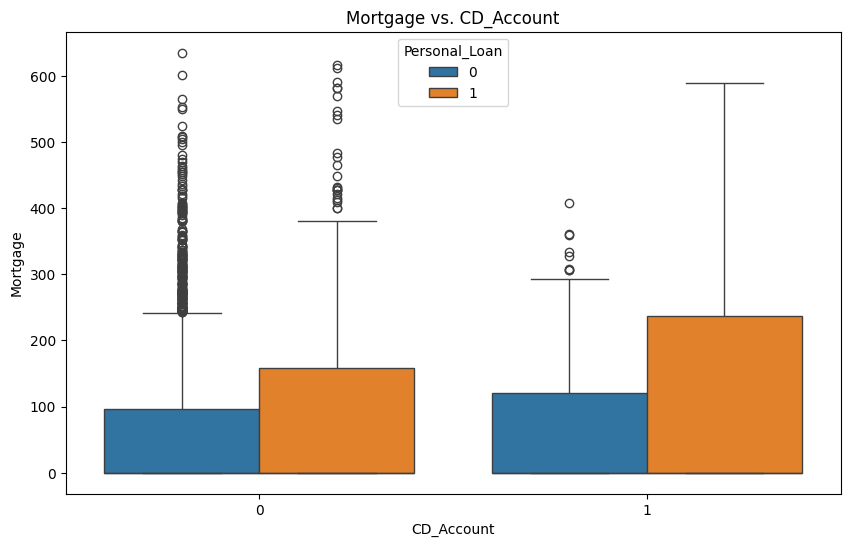

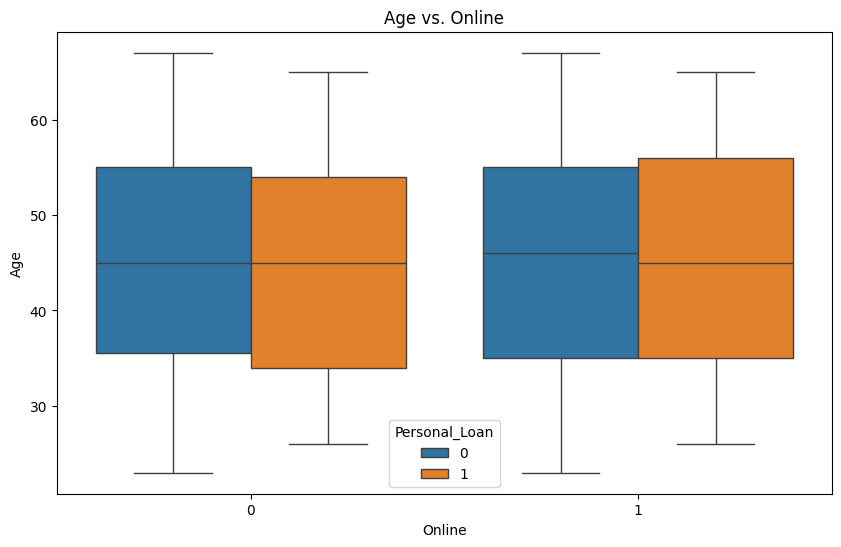

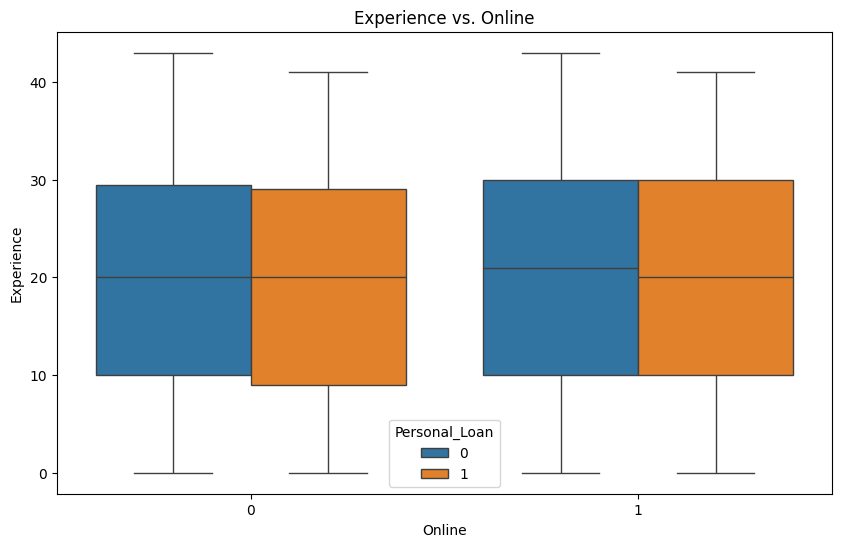

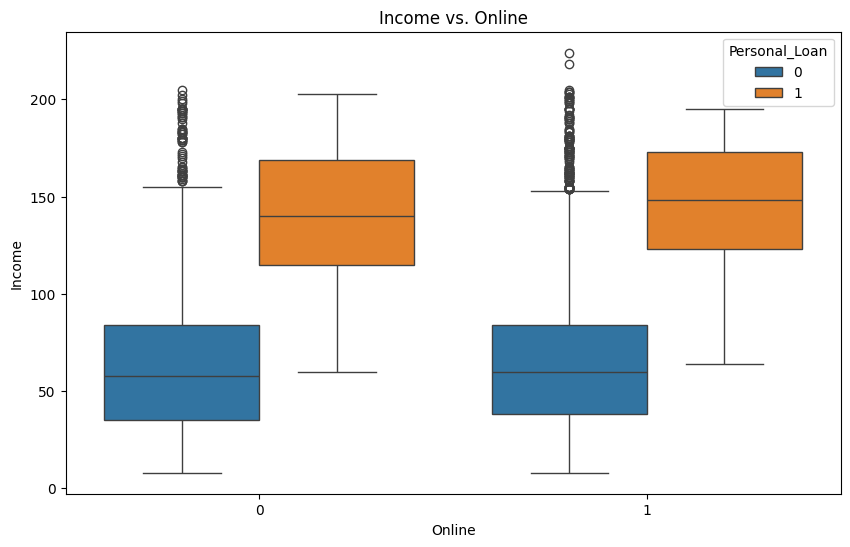

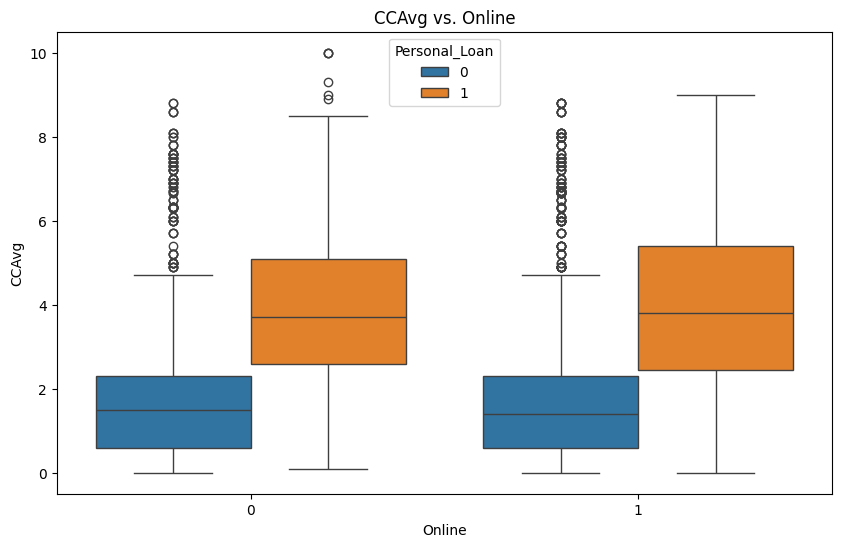

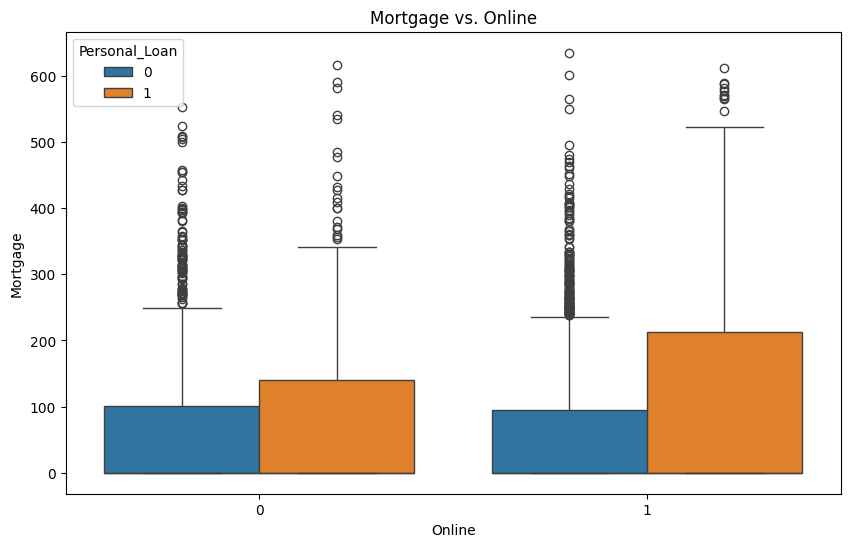

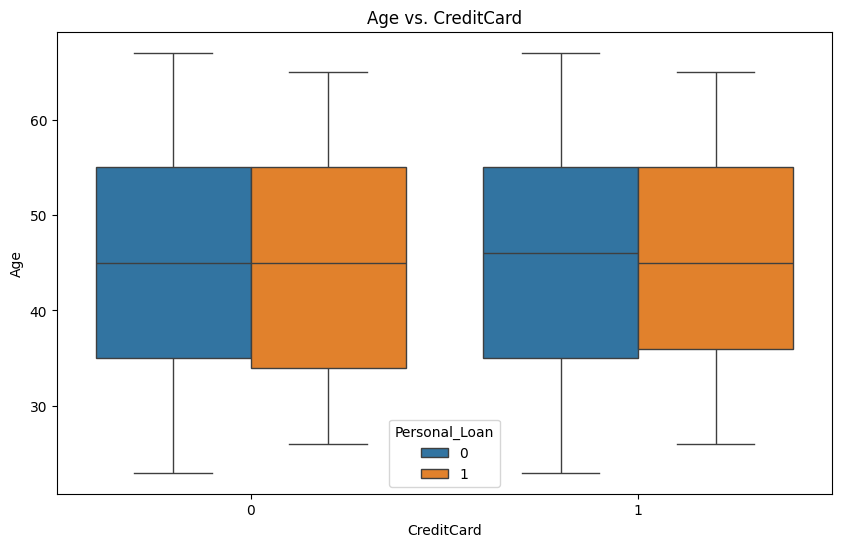

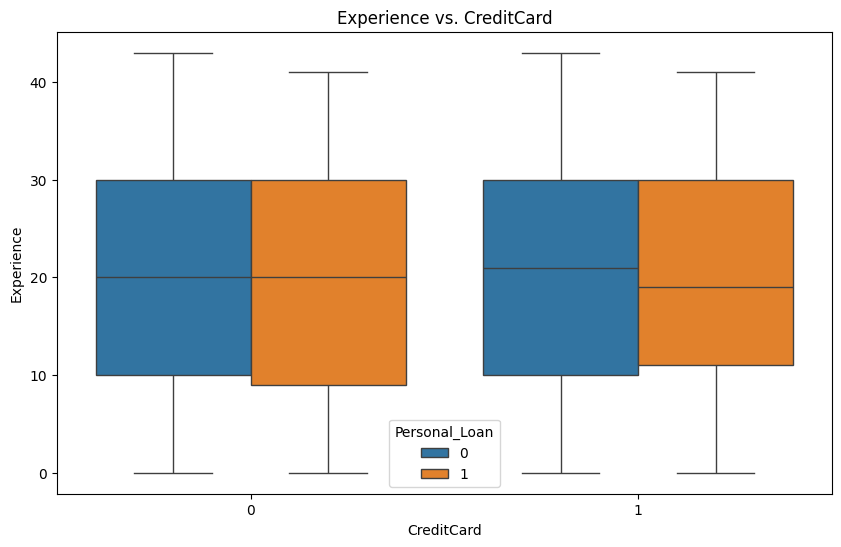

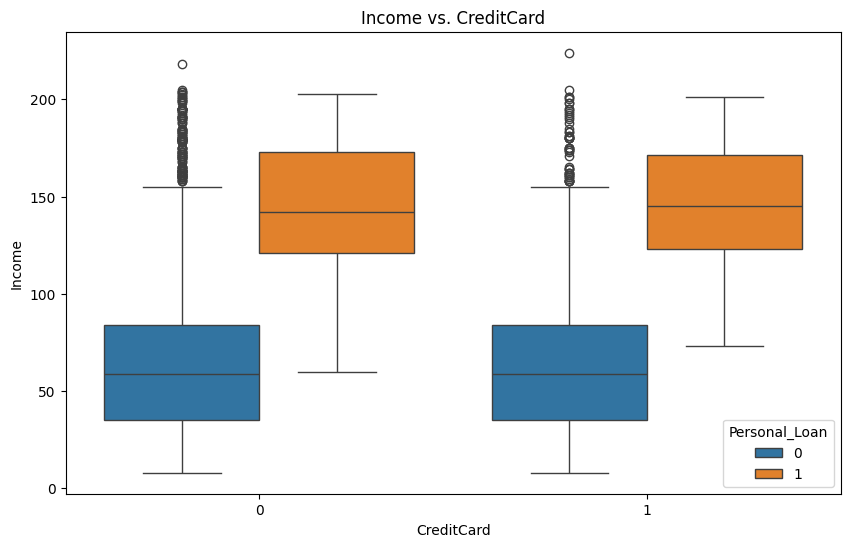

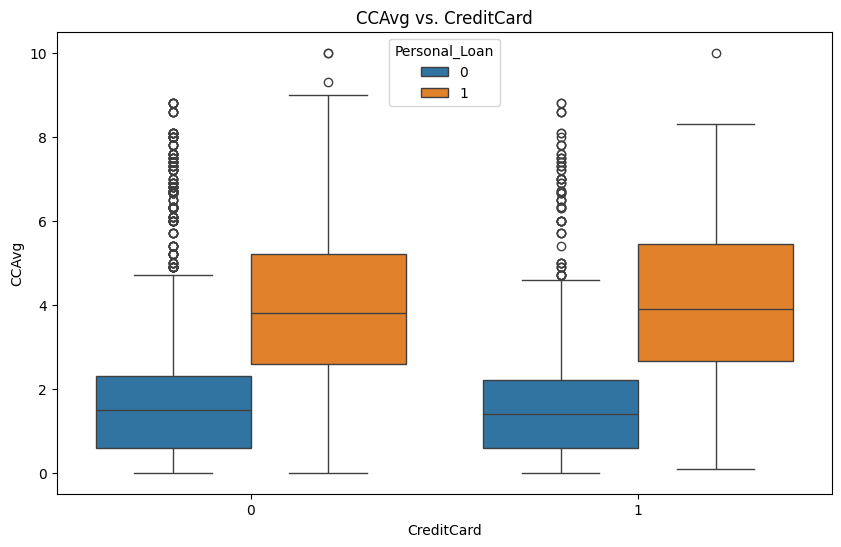

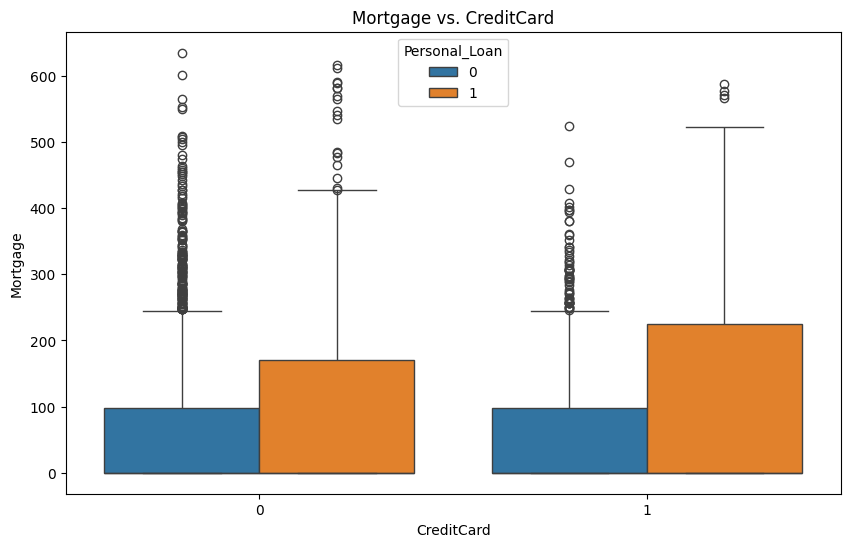

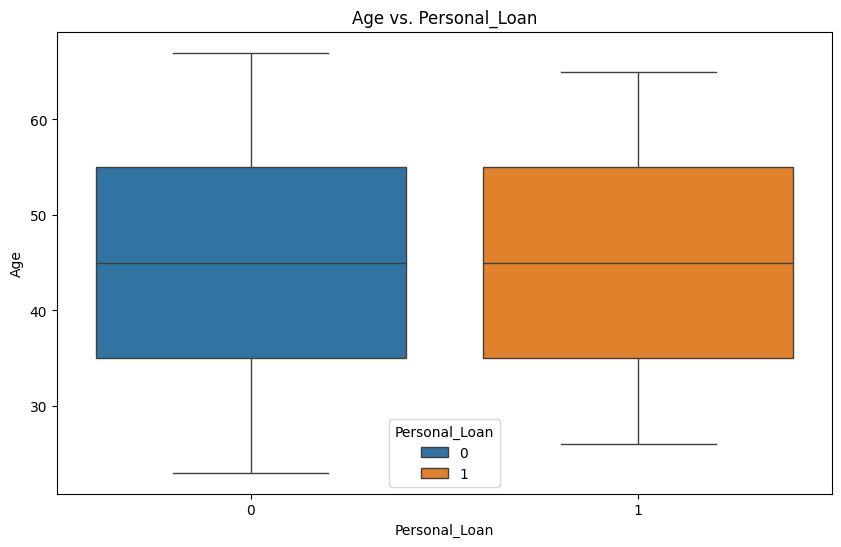

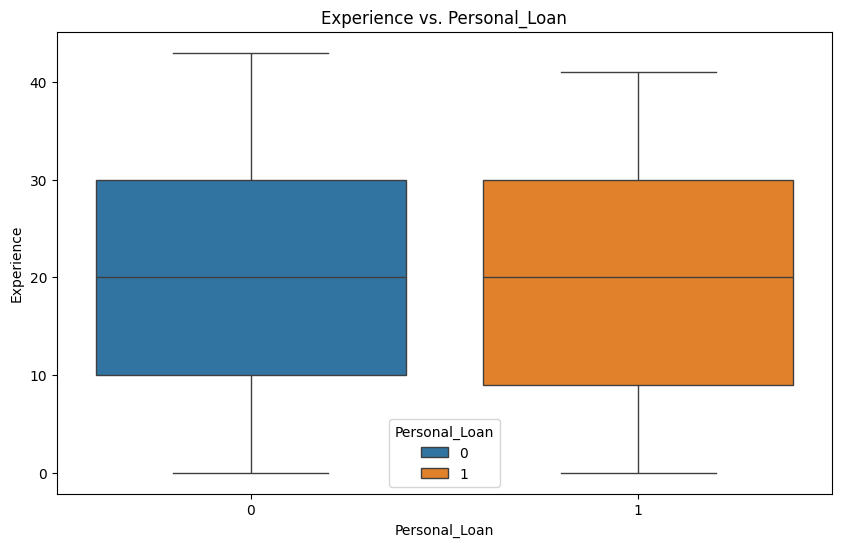

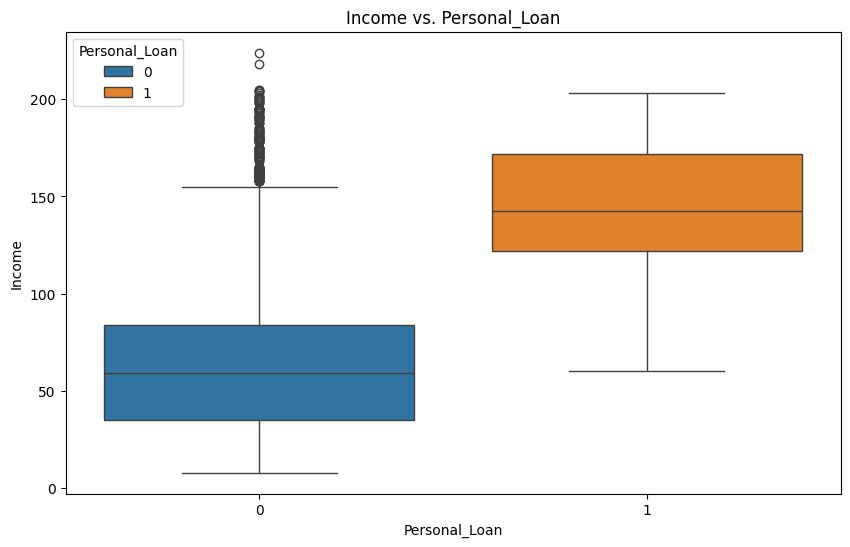

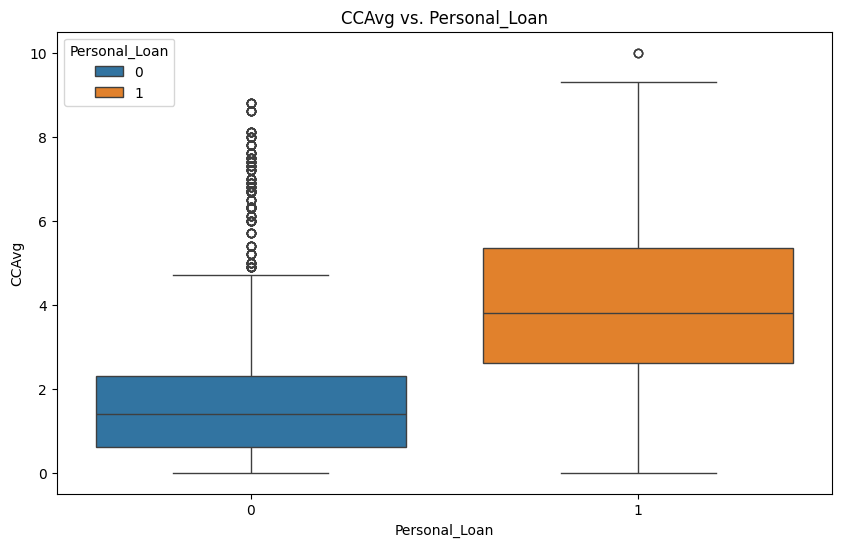

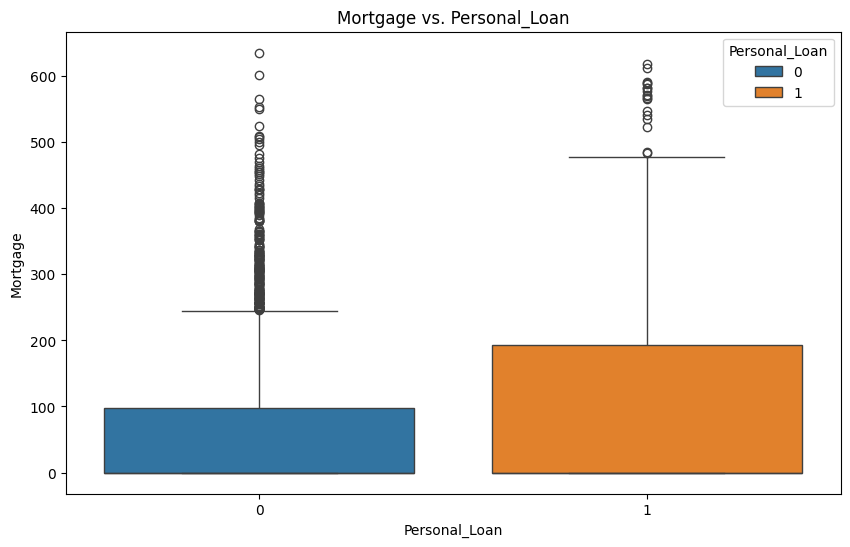

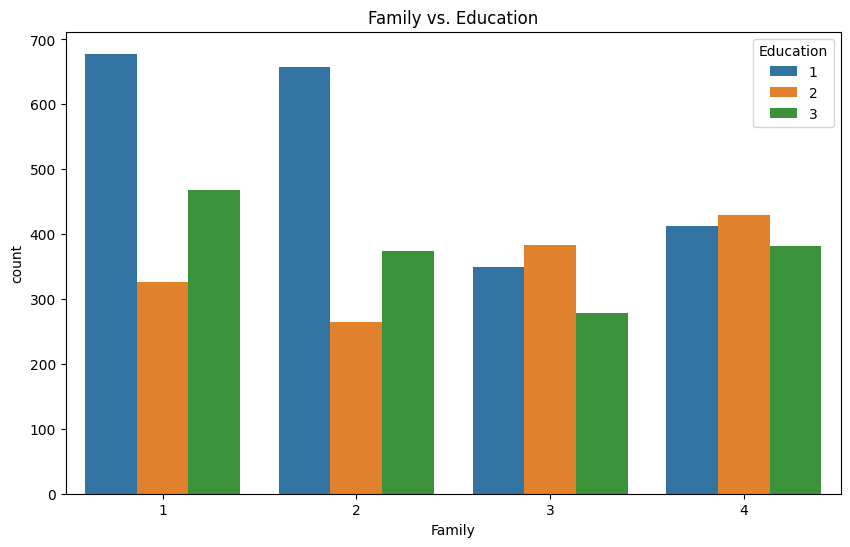

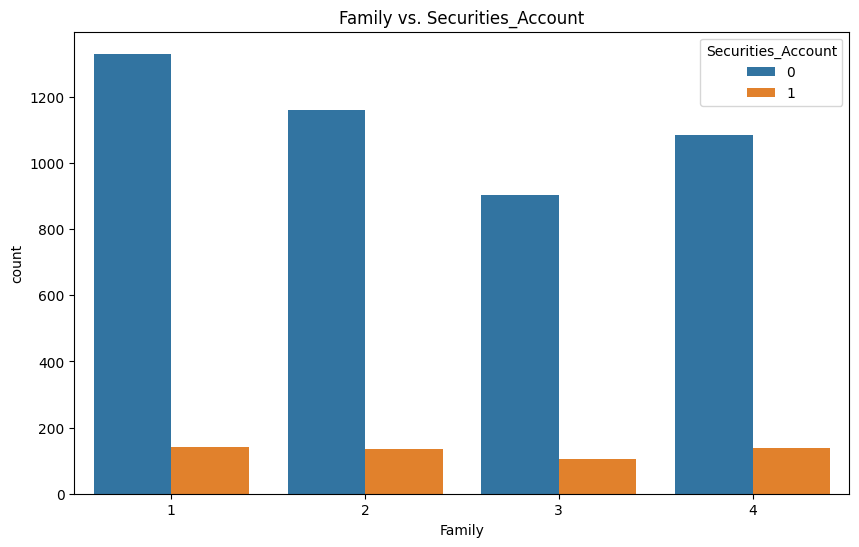

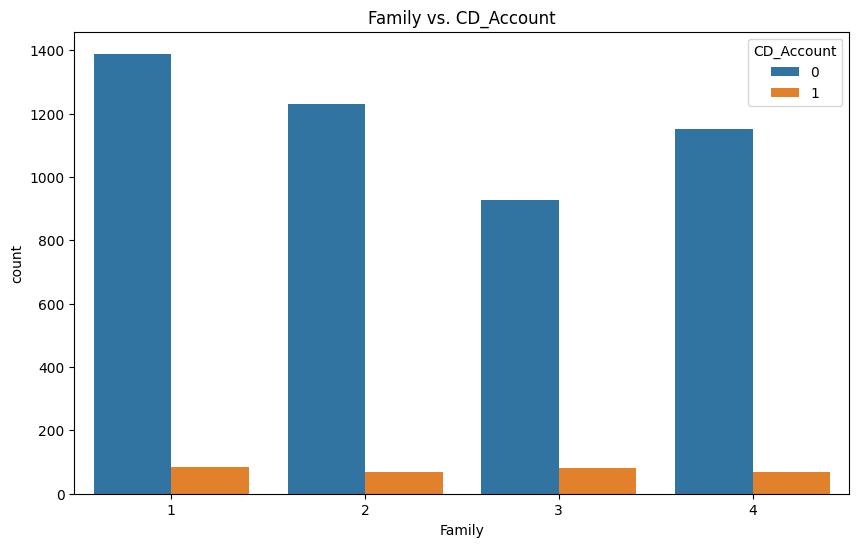

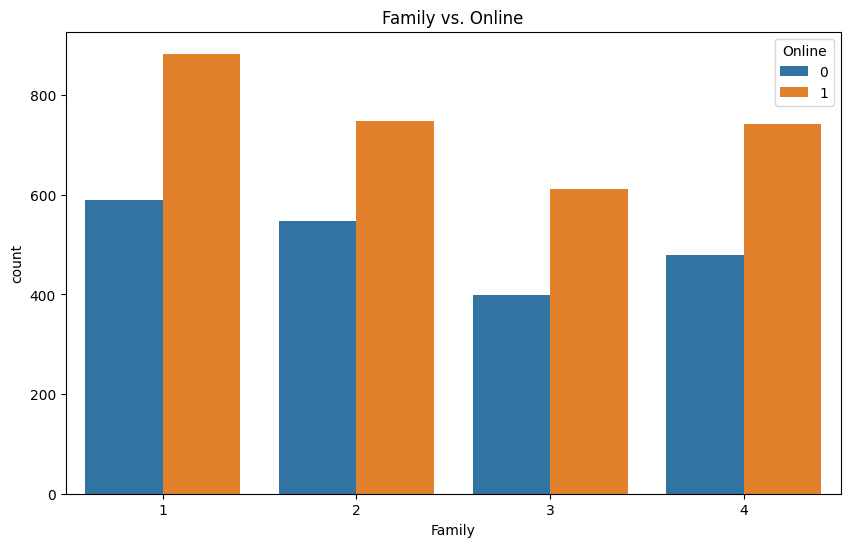

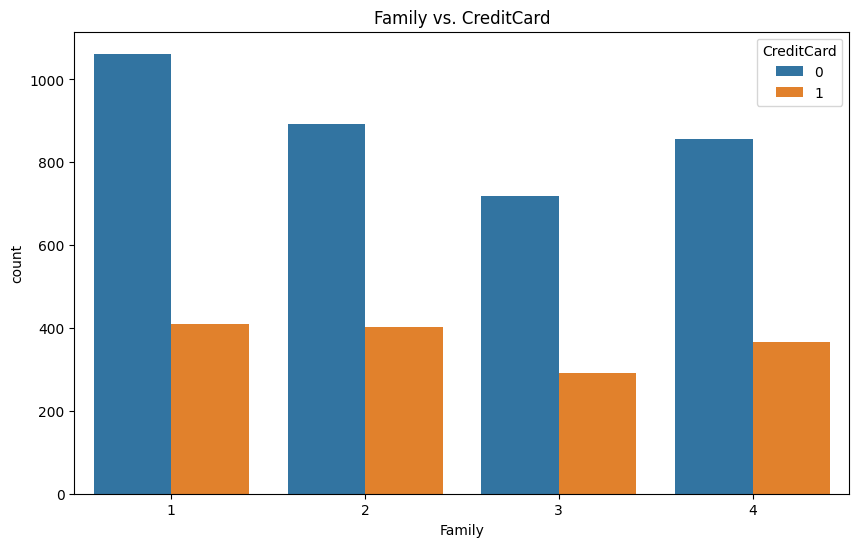

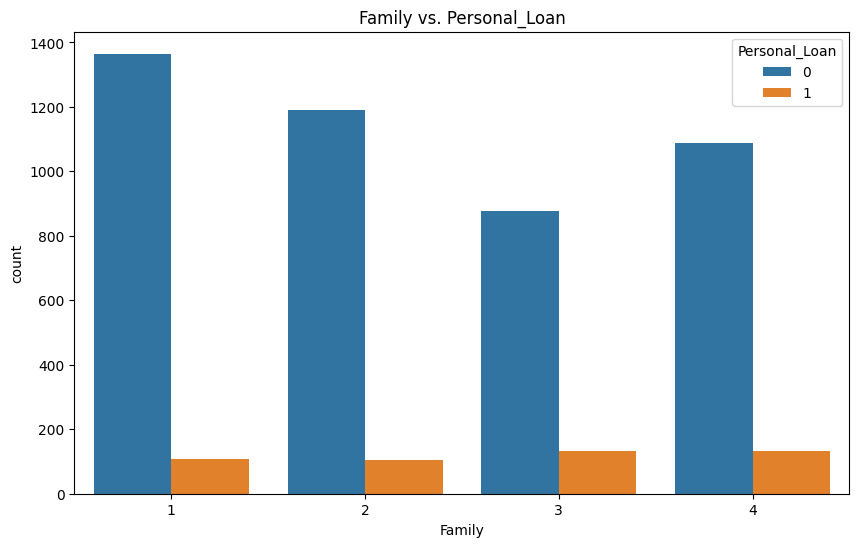

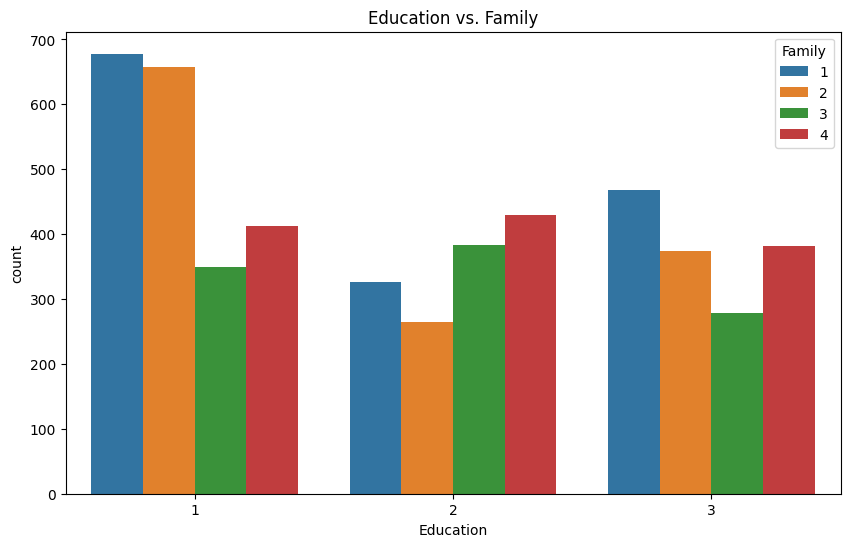

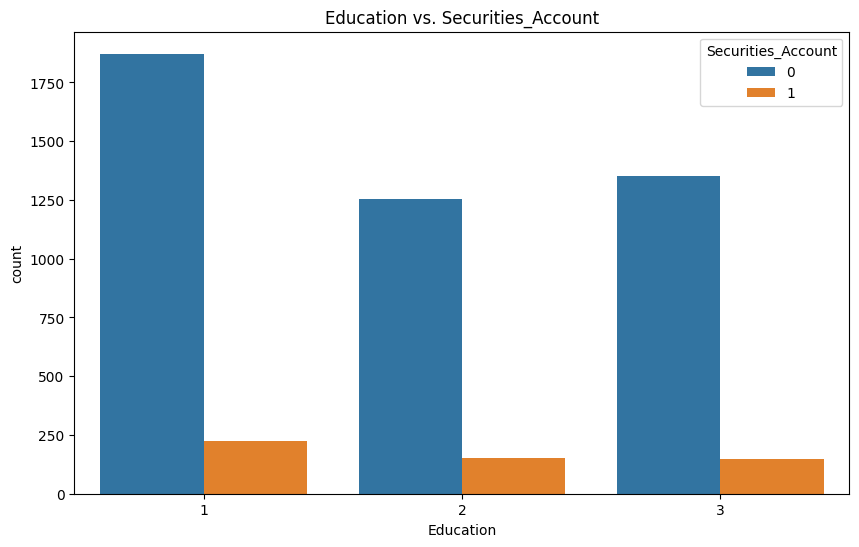

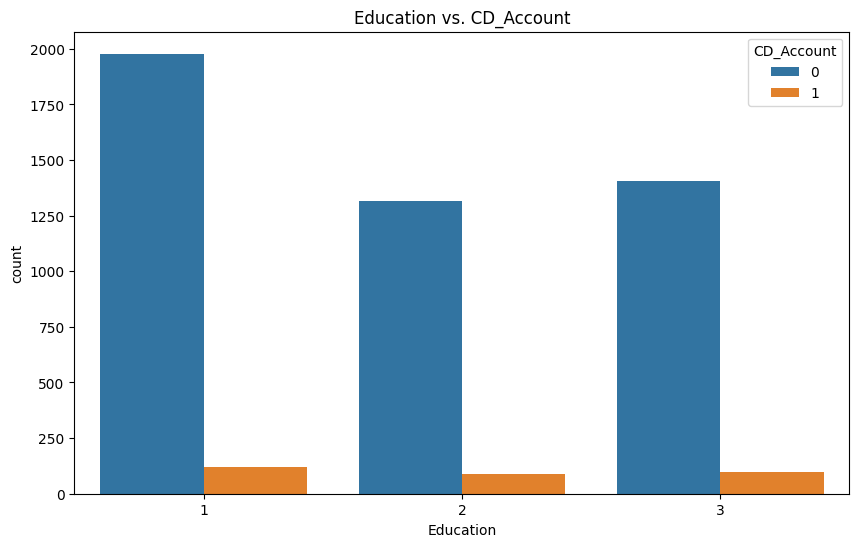

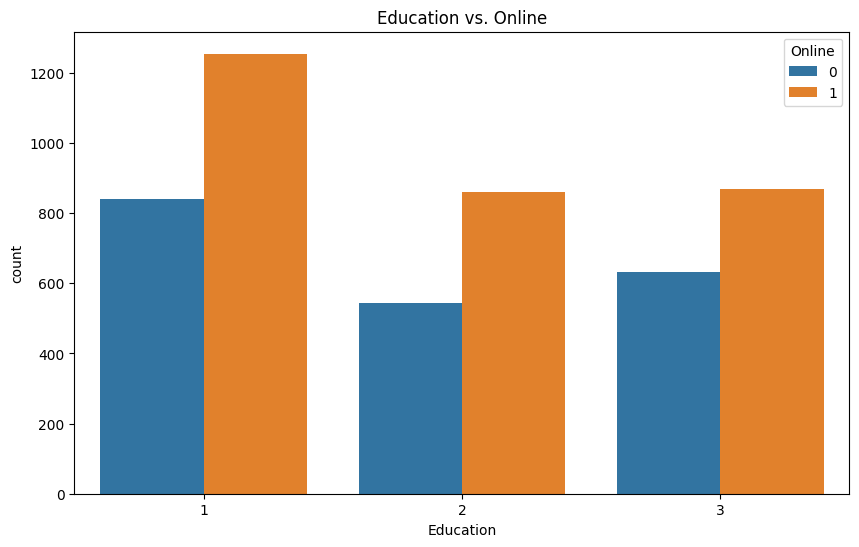

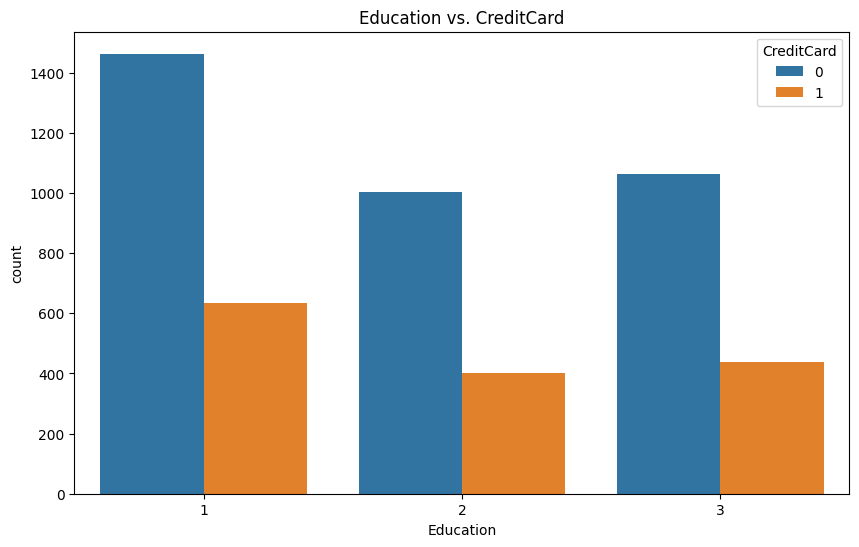

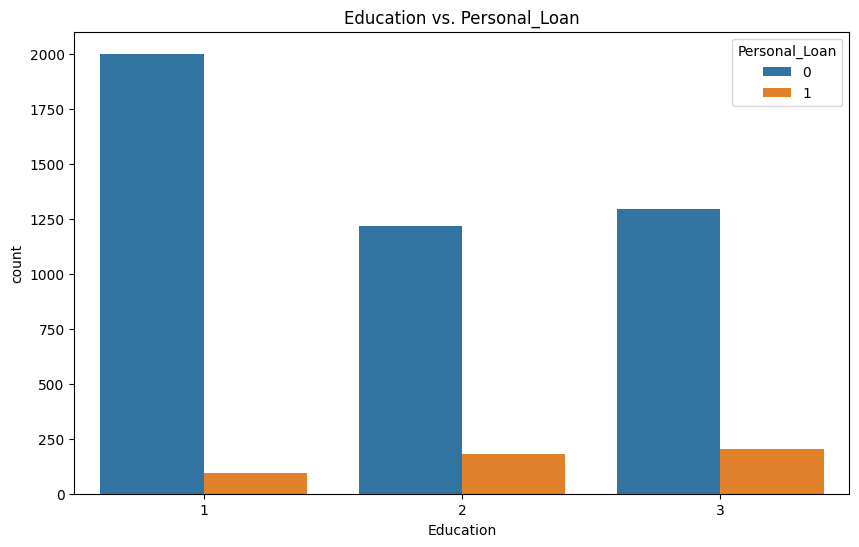

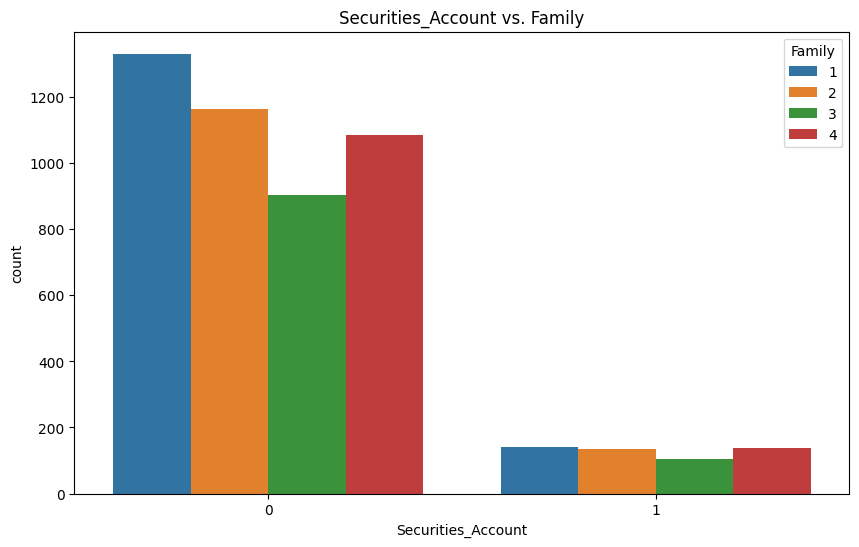

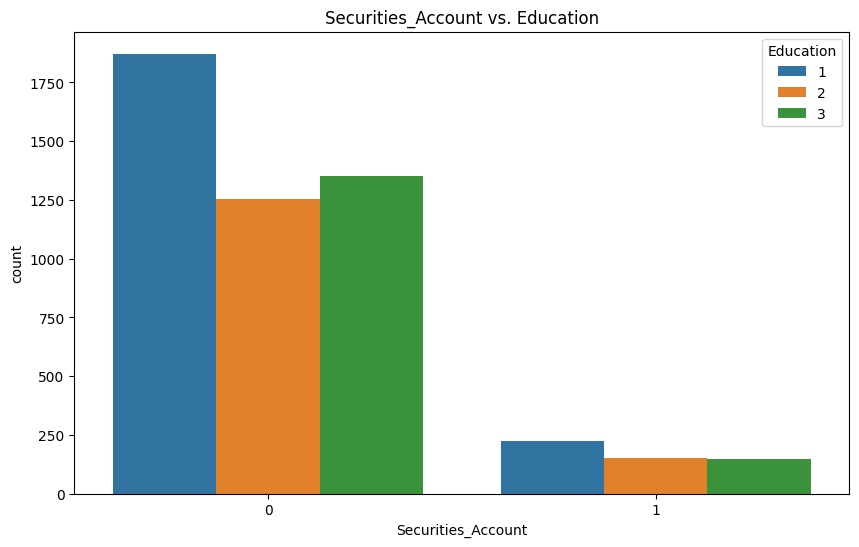

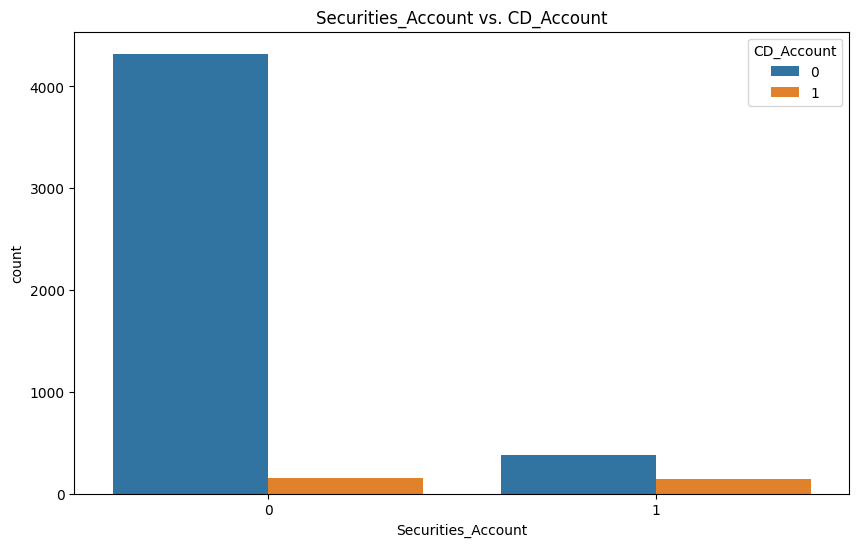

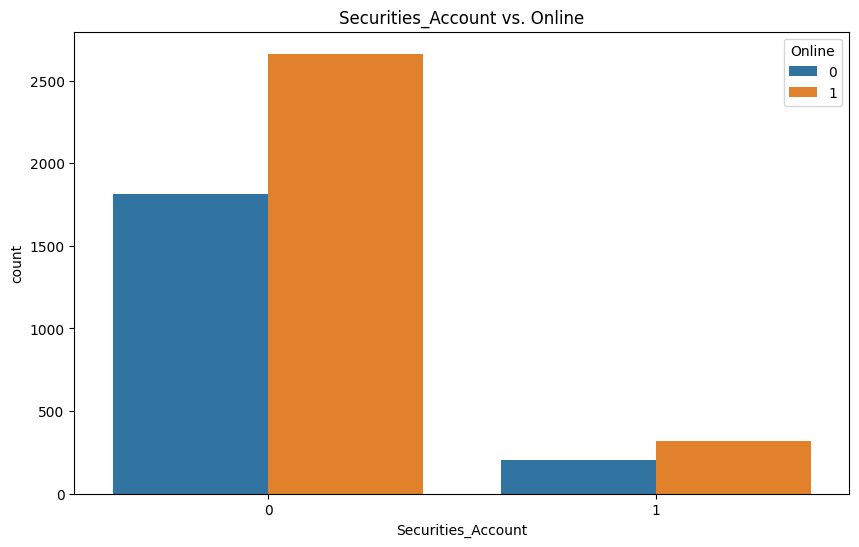

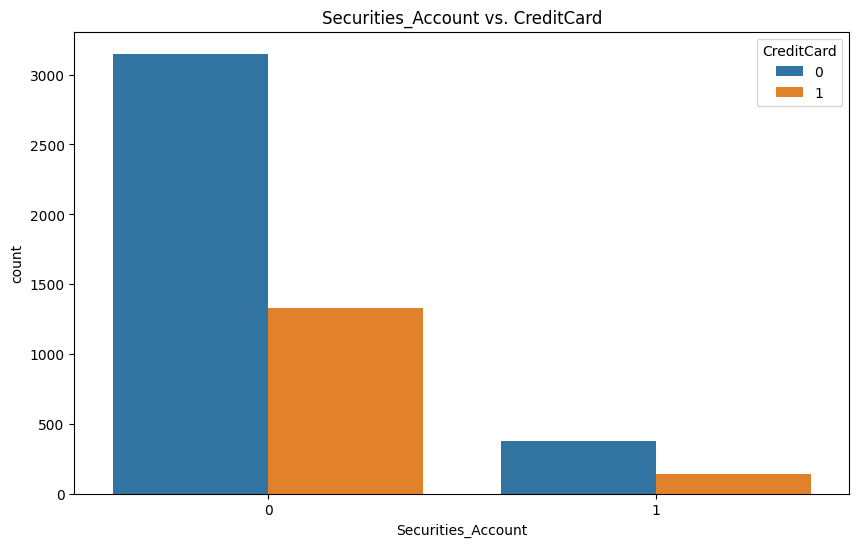

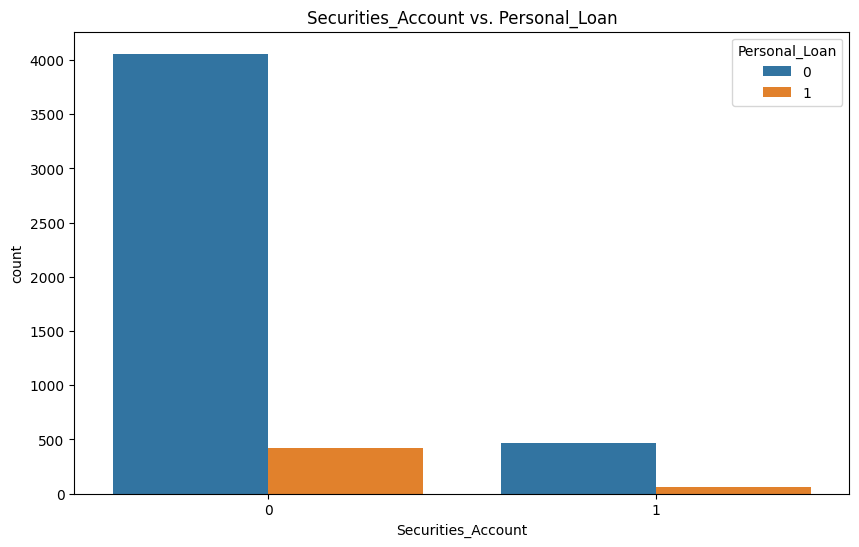

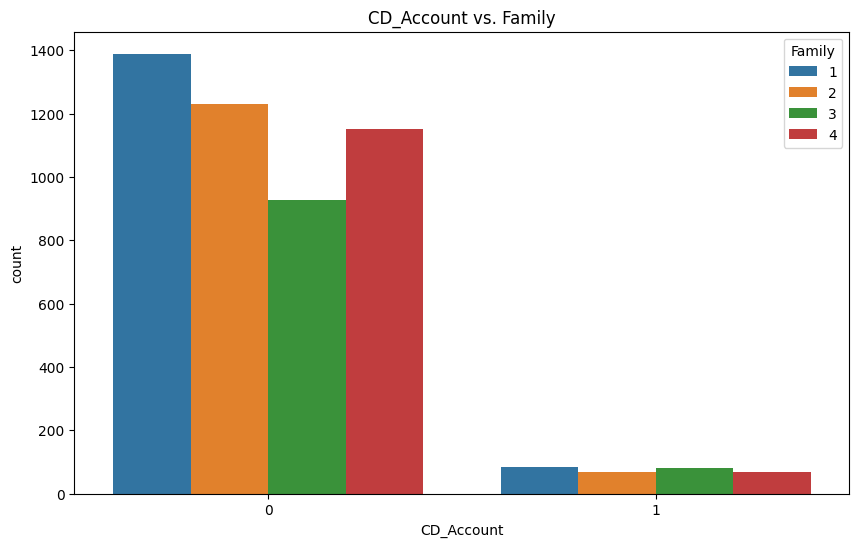

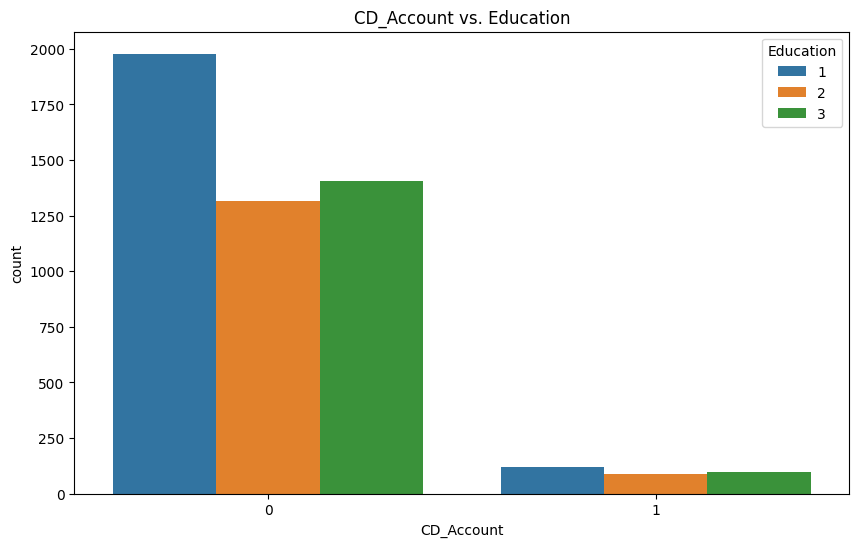

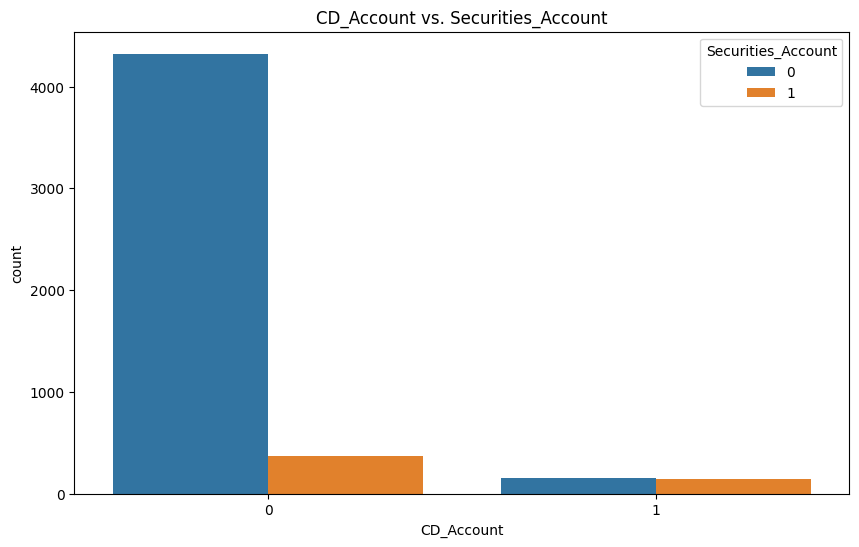

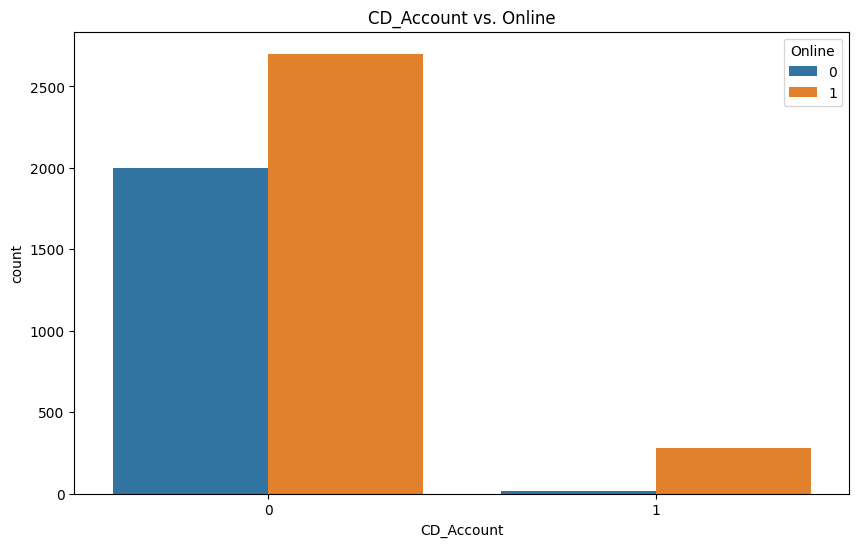

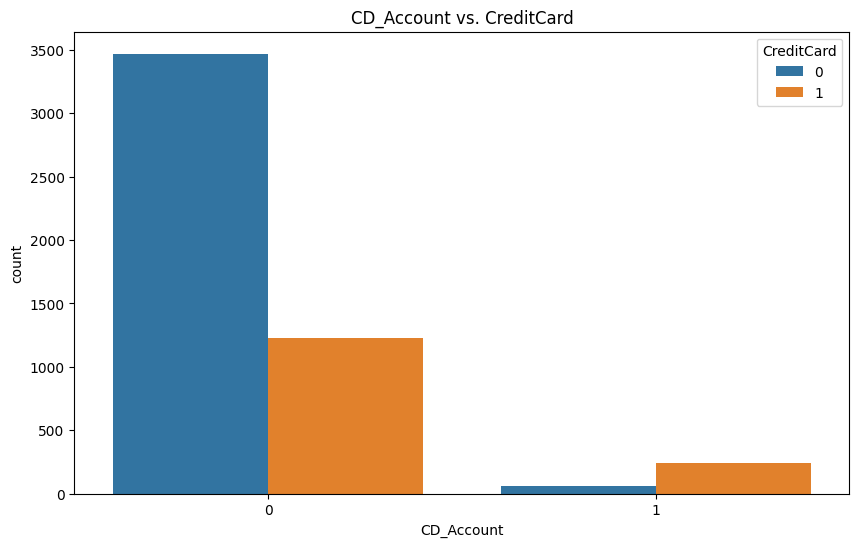

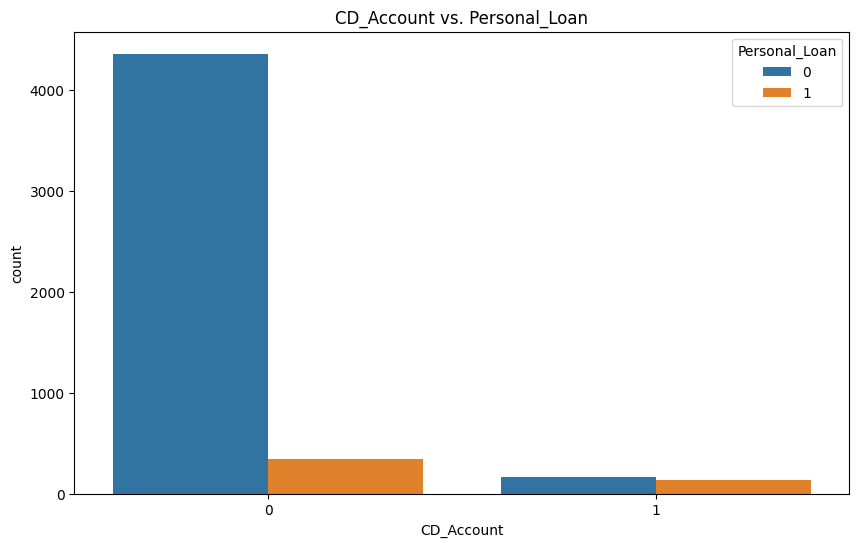

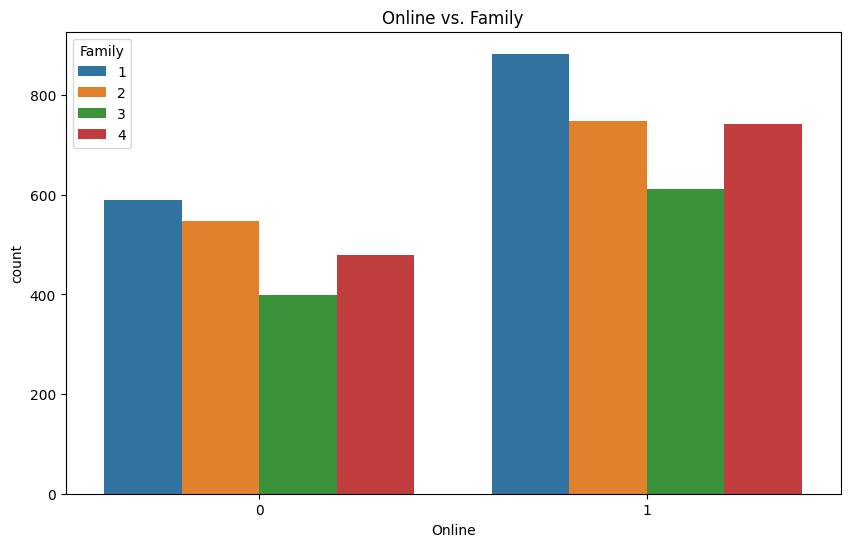

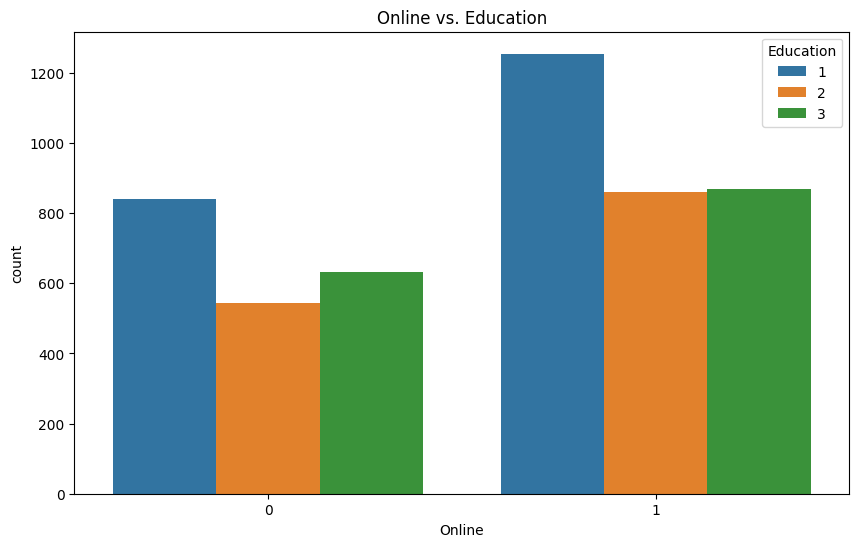

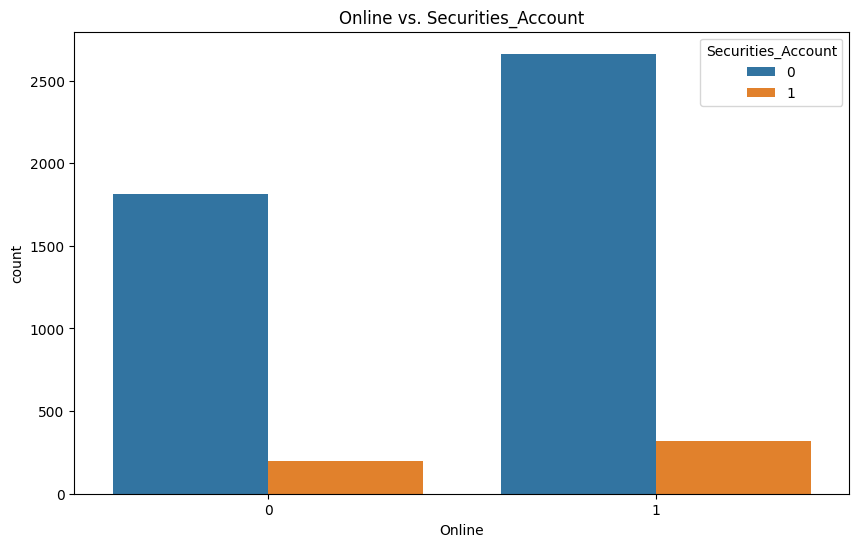

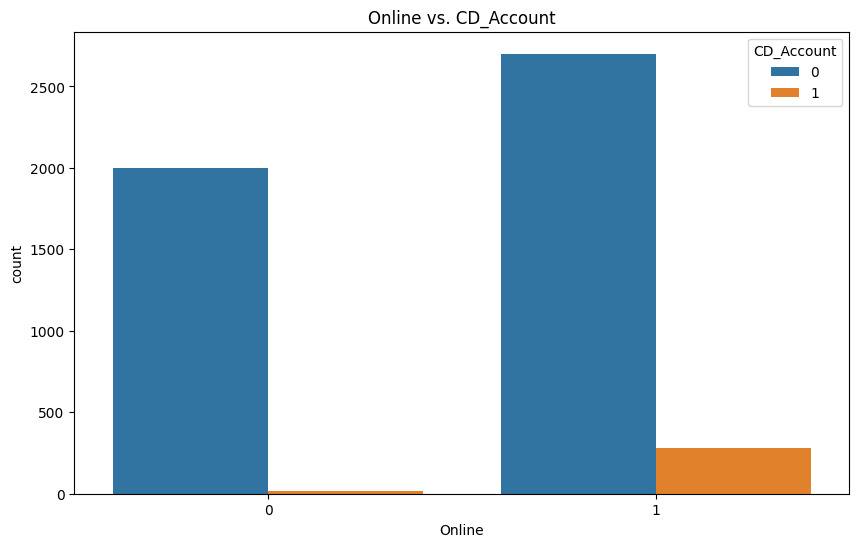

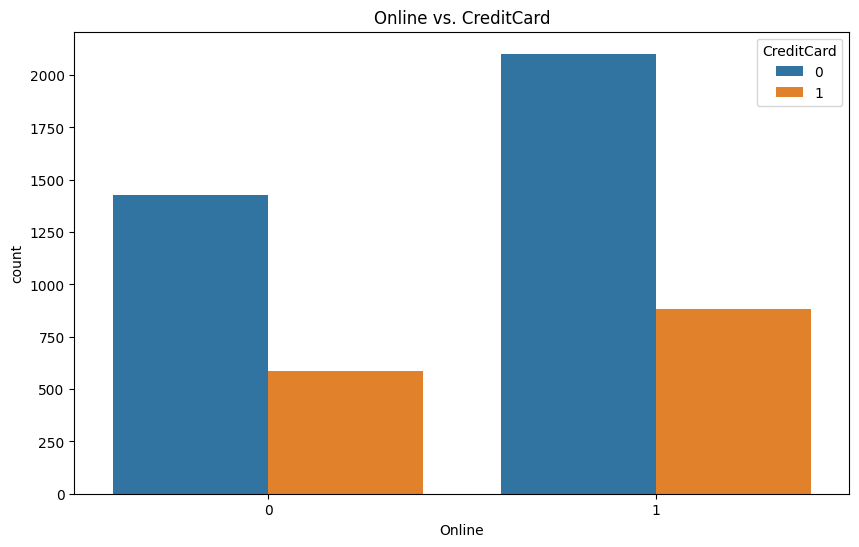

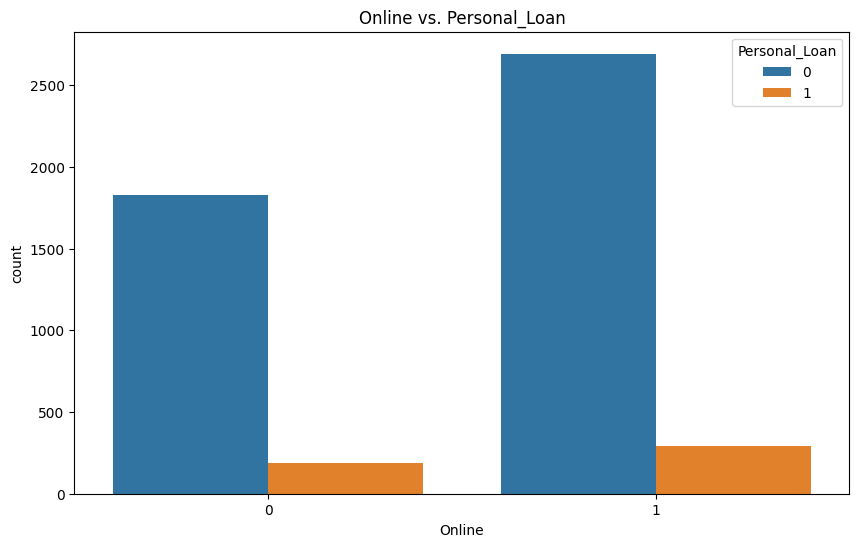

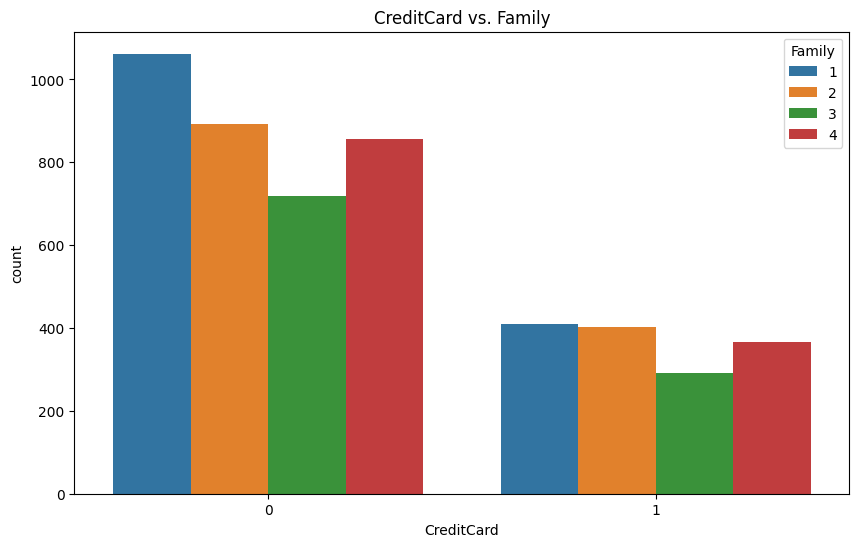

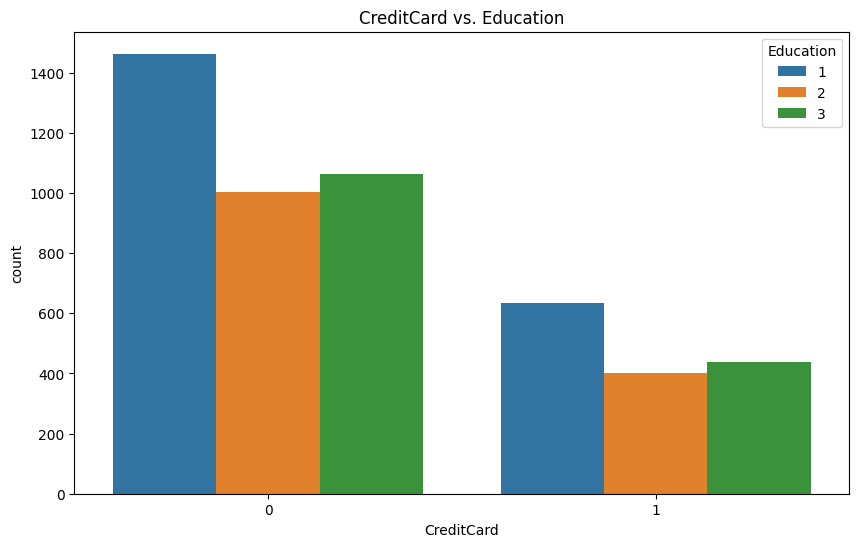

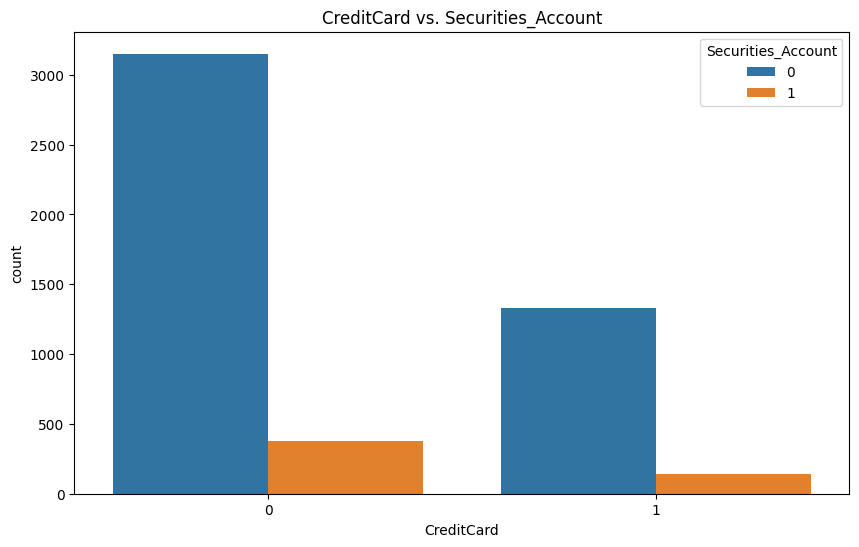

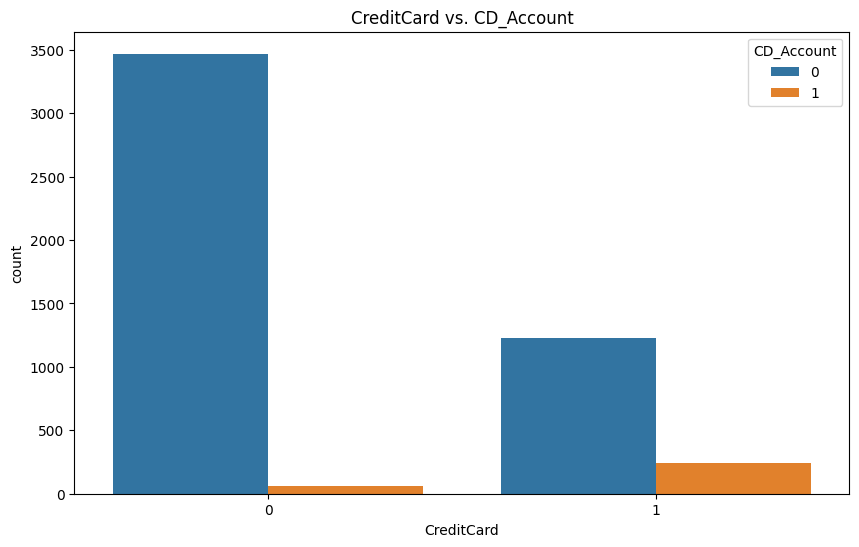

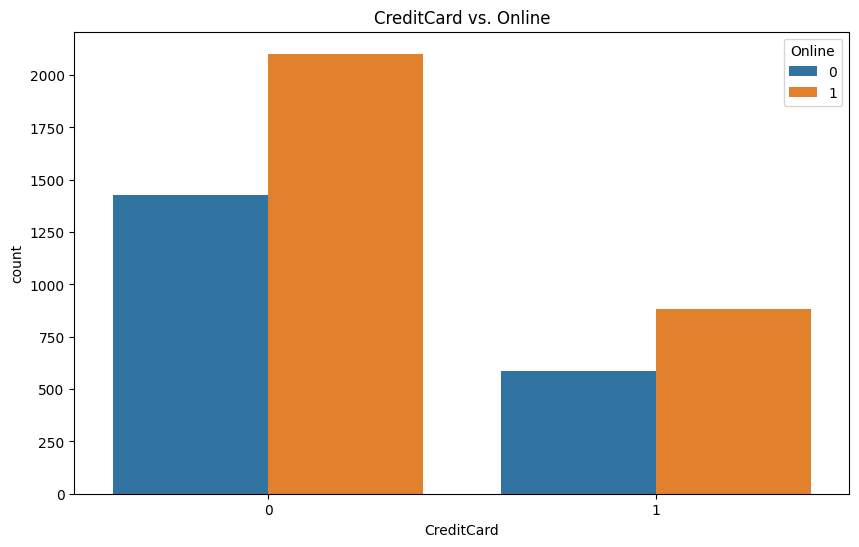

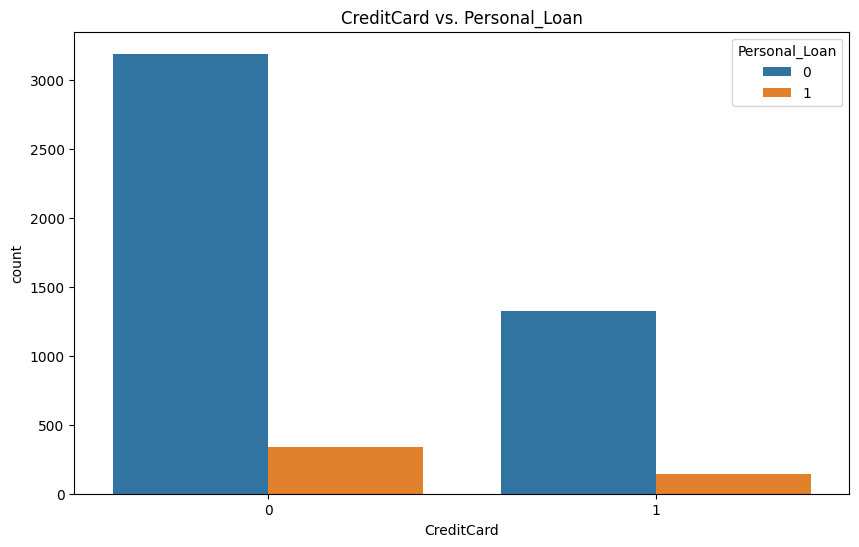

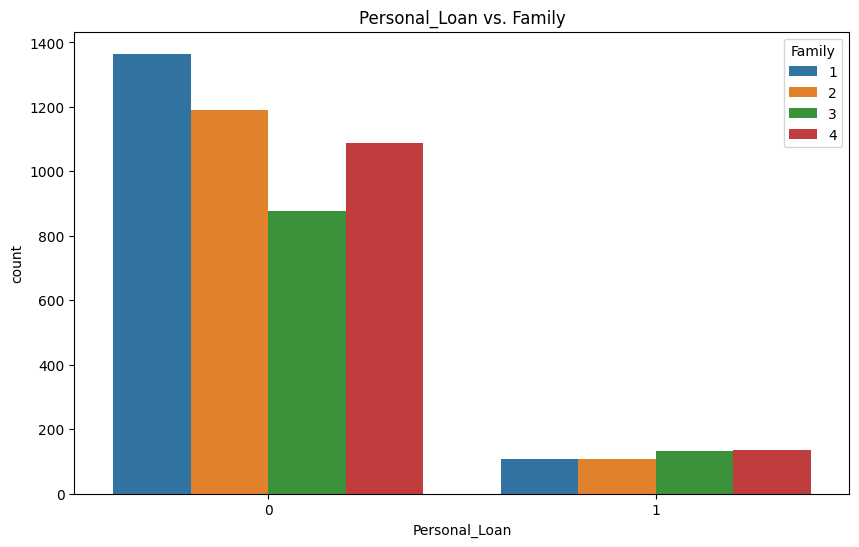

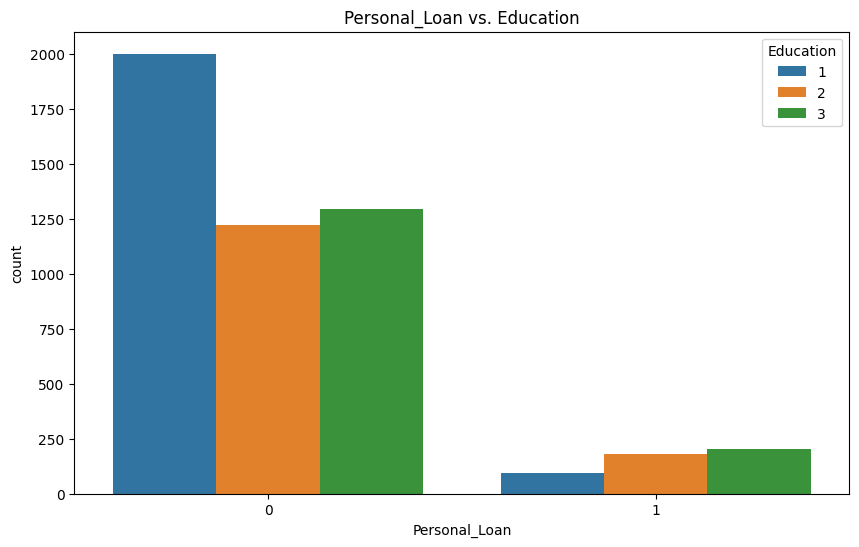

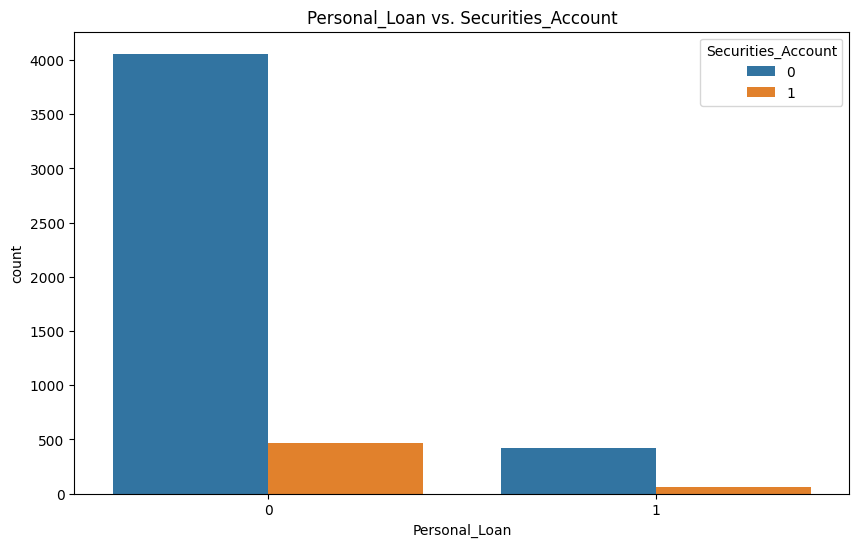

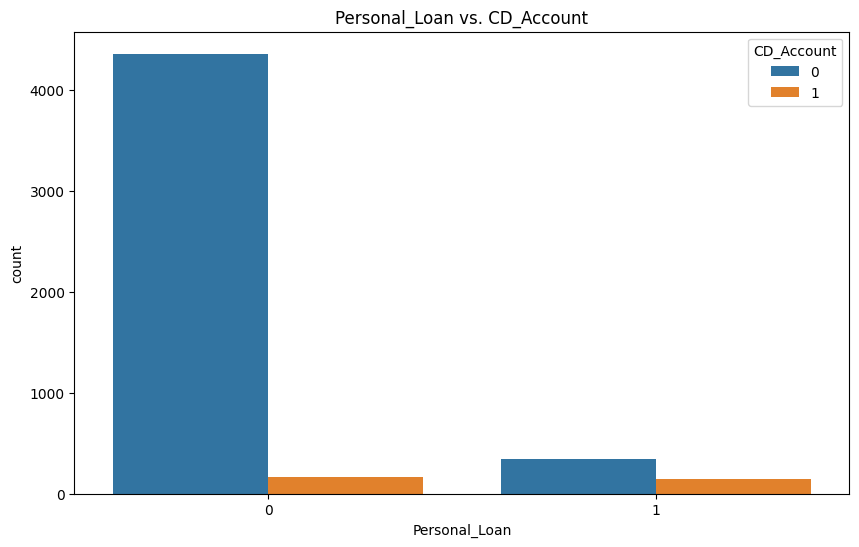

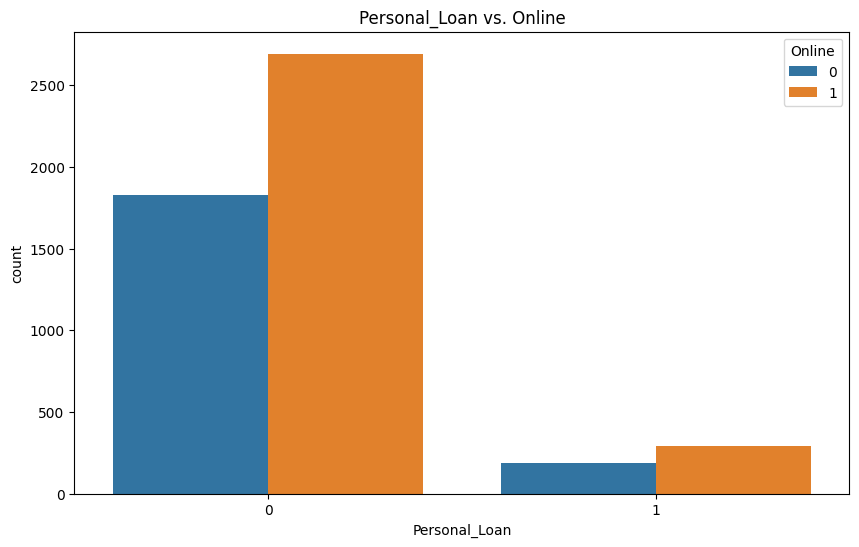

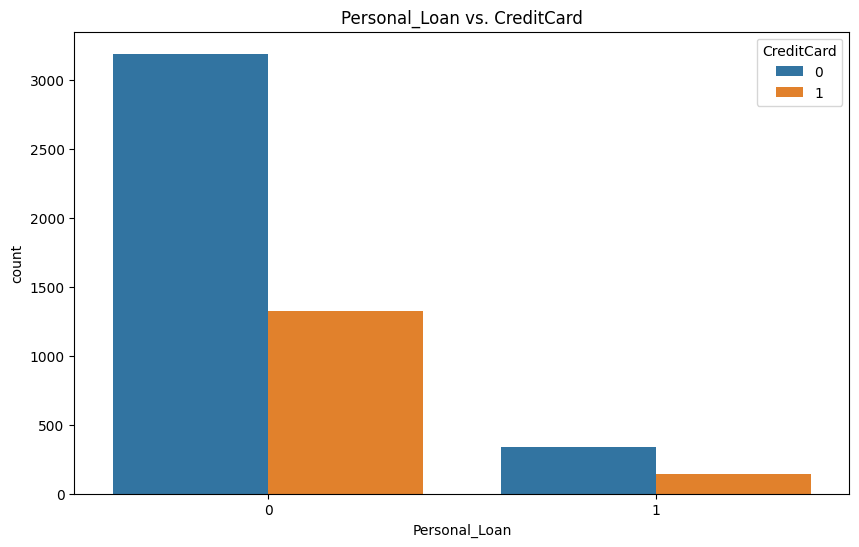

In [ ]:
# Bivariate Analysis

# Analyzing the relationship between pairs of feature
# Numerical vs. Numerical Features
sns.pairplot(data[numerical_features + ['Personal_Loan']], hue='Personal_Loan', diag_kind='kde')
plt.show()

# Categorical vs. Numerical Features
for categorical_feature in categorical_features:
    for numerical_feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=categorical_feature, y=numerical_feature, data=data, hue='Personal_Loan')
        plt.title(f'{numerical_feature} vs. {categorical_feature}')
        plt.show()

# Categorical vs. Categorical Features
for feature1 in categorical_features:
    for feature2 in categorical_features:
        if feature1 != feature2:
            plt.figure(figsize=(10, 6))
            sns.countplot(x=feature1, hue=feature2, data=data)
            plt.title(f'{feature1} vs. {feature2}')
            plt.show()


In [ ]:

# Insights from Bivariate Analysis:

# Numerical vs. Numerical Features:

# Income vs. CCAvg: There's a positive correlation between income and average credit card spending, as expected. Customers with higher incomes tend to spend more on credit cards.
# Income vs. Personal Loan: Customers who accepted a personal loan tend to have higher incomes compared to those who didn't.
# CCAvg vs. Personal Loan: Similarly, customers who accepted a personal loan tend to have higher average credit card spending.

# Categorical vs. Numerical Features:

# Education vs. Income: Customers with higher education levels generally have higher incomes.
# Education vs. Personal Loan: Customers with advanced/professional degrees are more likely to have accepted a personal loan.
# Family vs. Income: There's no clear trend between family size and income.
# CD Account vs. Personal Loan: Customers with a CD account are more likely to have accepted a personal loan.

# Categorical vs. Categorical Features:

# Personal Loan vs. Other Features: The countplots show the distribution of personal loan acceptance across different categories of other features. For example, customers with a CD account or a securities account are more likely to have accepted a personal loan.

# These insights provide a deeper understanding of the relationships between different features and their potential impact on the target variable (personal loan acceptance). They can be used to guide feature selection, model building, and targeting strategies.


#Model Evaluation Criterion

## Model Building

In [ ]:
# prepare data for model building

# Separating the target variable from the features
X = data.drop('Personal_Loan', axis=1)
y = data['Personal_Loan']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Encoding categorical features using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensuring both training and testing sets have the same columns
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)


In [ ]:
print(f"Shape of Training set : {X_train.shape}")
print(f"Shape of test set : {X_test.shape}")
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set : (3500, 21)
Shape of test set : (1500, 21)
Percentage of classes in training set:
Personal_Loan
0    0.907714
1    0.092286
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.895333
1    0.104667
Name: proportion, dtype: float64


In [ ]:
#  Function to compute different metrics to check performance of a classification model built using sklearn

def get_metrics_score(model,flag=True):
  '''
  model : classifier to predict values of X

  '''
  if flag==True:
    #for training set
    y_train_pred = model.predict(X_train)
    print("----Training set metrics----")
    print("Accuracy score: ",accuracy_score(y_train,y_train_pred))
    print("Precision score: ",precision_score(y_train,y_train_pred))
    print("Recall score: ",recall_score(y_train,y_train_pred))
    print("F1 score: ",f1_score(y_train,y_train_pred))
    print("Confusion Matrix:\n ",confusion_matrix(y_train,y_train_pred))
  else:
    #for test set
    y_test_pred = model.predict(X_test)
    print("----Test set metrics----")
    print("Accuracy score: ",accuracy_score(y_test,y_test_pred))
    print("Precision score: ",precision_score(y_test,y_test_pred))
    print("Recall score: ",recall_score(y_test,y_test_pred))
    print("F1 score: ",f1_score(y_test,y_test_pred))
    print("Confusion Matrix:\n ",confusion_matrix(y_test,y_test_pred))


In [ ]:
#Calculating the difference metric and confusion Matrix
def get_metrics_score(model,flag=True):
  '''
  model : classifier to predict values of X

  '''
  # defining an empty list to store train and test results
  score_list=[]

  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)

  train_acc = accuracy_score(y_train,pred_train)
  test_acc = accuracy_score(y_test,pred_test)

  train_recall = recall_score(y_train,pred_train)
  test_recall = recall_score(y_test,pred_test)

  train_precision = precision_score(y_train,pred_train)
  test_precision = precision_score(y_test,pred_test)

  train_f1 = f1_score(y_train,pred_train)
  test_f1 = f1_score(y_test,pred_test)

  score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))

  # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
  if flag == True:
    print("Accuracy on training set : ",accuracy_score(y_train,pred_train))
    print("Accuracy on test set : ",accuracy_score(y_test,pred_test))
    print("Recall on training set : ",recall_score(y_train,pred_train))
    print("Recall on test set : ",recall_score(y_test,pred_test))
    print("Precision on training set : ",precision_score(y_train,pred_train))
    print("Precision on test set : ",precision_score(y_test,pred_test))
    print("F1 on training set : ",f1_score(y_train,pred_train))
    print("F1 on test set : ",f1_score(y_test,pred_test))

  return score_list # returning the list with train and test scores

def make_confusion_matrix(model,y_actual,labels=[1, 0]):
  '''
  model : classifier to predict values of X
  y_actual : ground truth

  '''
  y_predict = model.predict(X_test)
  cm=confusion_matrix( y_actual, y_predict, labels=[1, 0])
  df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Yes","Actual - No"]],
                    columns = [i for i in ['Predicted - Yes','Predicted - No']])
  group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm, annot=labels,fmt='')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')



Accuracy on training set :  1.0
Accuracy on test set :  0.9833333333333333
Recall on training set :  1.0
Recall on test set :  0.9235668789808917
Precision on training set :  1.0
Precision on test set :  0.9177215189873418
F1 on training set :  1.0
F1 on test set :  0.9206349206349206
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy on training set :  0.9857142857142858
Accuracy on test set :  0.9826666666666667
Recall on training set :  0.8513931888544891
Recall on test set :  0.8726114649681529
Precision on training set :  0.9927797833935018
Precision on test set :  0.958041958041958
F1 on training set :  0.9166666666666666
F1 on test set :  0.9133333333333333


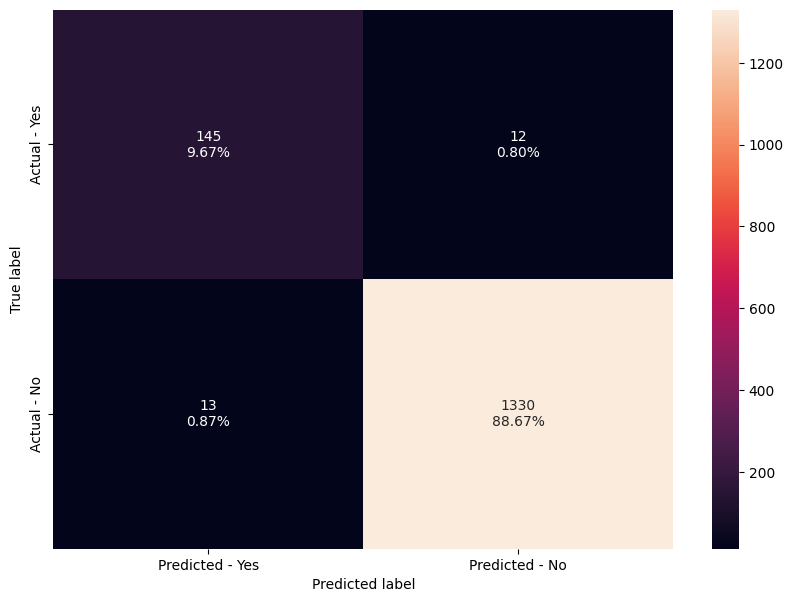

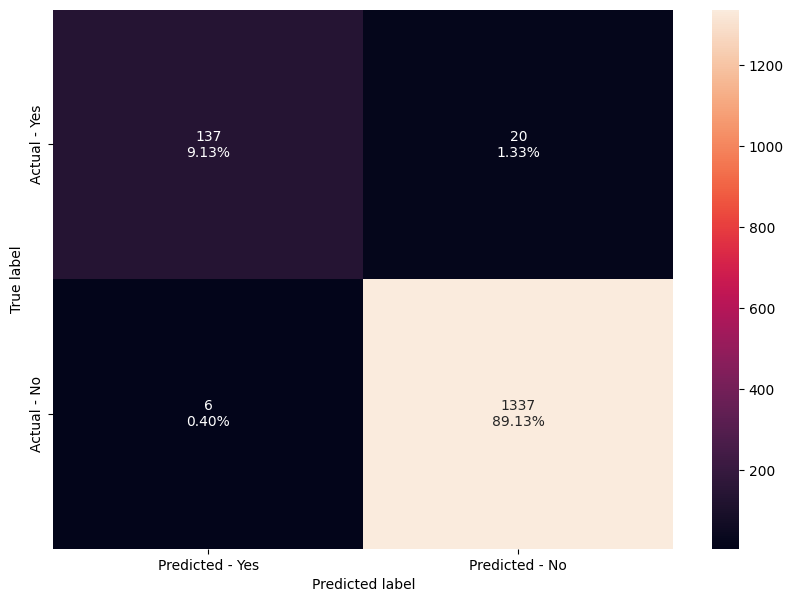

In [ ]:

# Building a Decision Tree Model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Evaluating the Decision Tree Model
get_metrics_score(dtree)
make_confusion_matrix(dtree,y_test)

# Hyperparameter Tuning for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best Parameters and Best Model
print("Best Parameters:", grid_search.best_params_)
best_dtree = grid_search.best_estimator_

# Evaluating the Tuned Decision Tree Model
get_metrics_score(best_dtree)
make_confusion_matrix(best_dtree,y_test)


### Check the model performance


*


In [ ]:
#check the model performance on training data

get_metrics_score(best_dtree, flag=True)


Accuracy on training set :  0.9857142857142858
Accuracy on test set :  0.9826666666666667
Recall on training set :  0.8513931888544891
Recall on test set :  0.8726114649681529
Precision on training set :  0.9927797833935018
Precision on test set :  0.958041958041958
F1 on training set :  0.9166666666666666
F1 on test set :  0.9133333333333333


[0.9857142857142858,
 0.9826666666666667,
 0.8513931888544891,
 0.8726114649681529,
 0.9927797833935018,
 0.958041958041958,
 0.9166666666666666,
 0.9133333333333333]

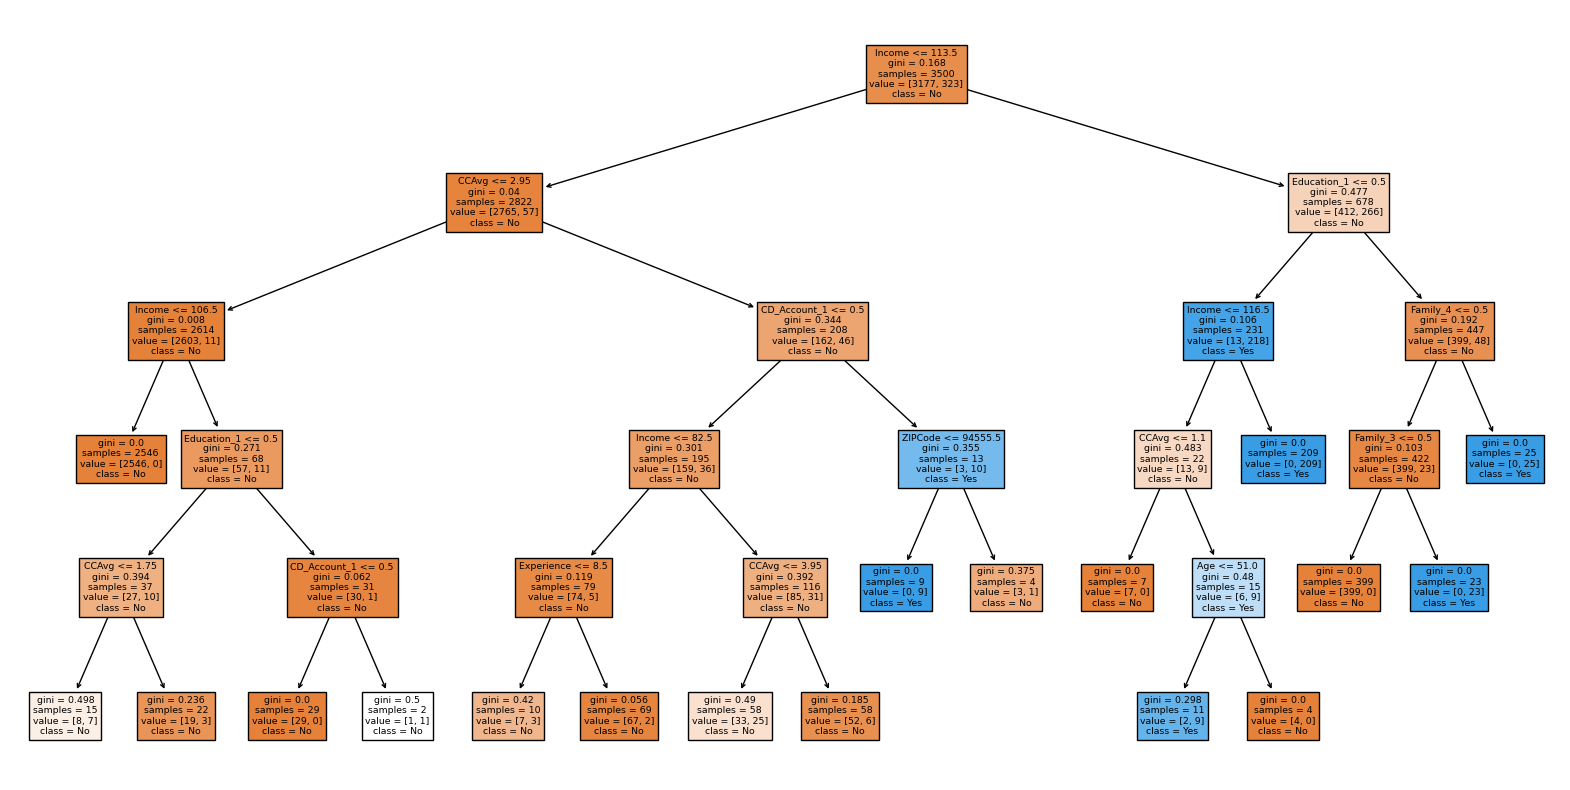

In [ ]:
#Visualizing the Decision Tree

plt.figure(figsize=(20, 10))
tree.plot_tree(best_dtree, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


In [ ]:
#check the model perfromance on test data

#check the model performance on test data
get_metrics_score(best_dtree, flag=False)


[0.9857142857142858,
 0.9826666666666667,
 0.8513931888544891,
 0.8726114649681529,
 0.9927797833935018,
 0.958041958041958,
 0.9166666666666666,
 0.9133333333333333]

### Model Performance Improvement

Accuracy on training set :  1.0
Accuracy on test set :  0.9826666666666667
Recall on training set :  1.0
Recall on test set :  0.910828025477707
Precision on training set :  1.0
Precision on test set :  0.9225806451612903
F1 on training set :  1.0
F1 on test set :  0.9166666666666666
Best Parameters (Resampled): {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on training set :  1.0
Accuracy on test set :  0.9853333333333333
Recall on training set :  1.0
Recall on test set :  0.9490445859872612
Precision on training set :  1.0
Precision on test set :  0.9141104294478528
F1 on training set :  1.0
F1 on test set :  0.9312500000000001


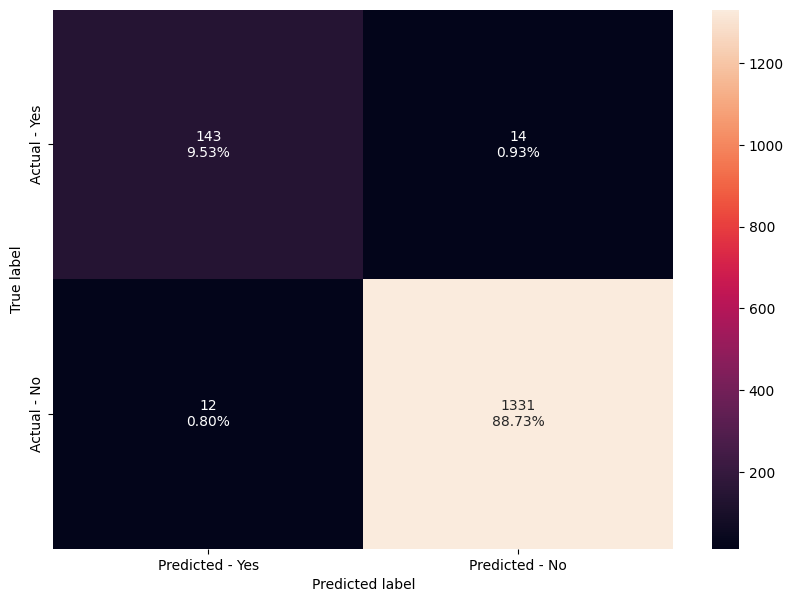

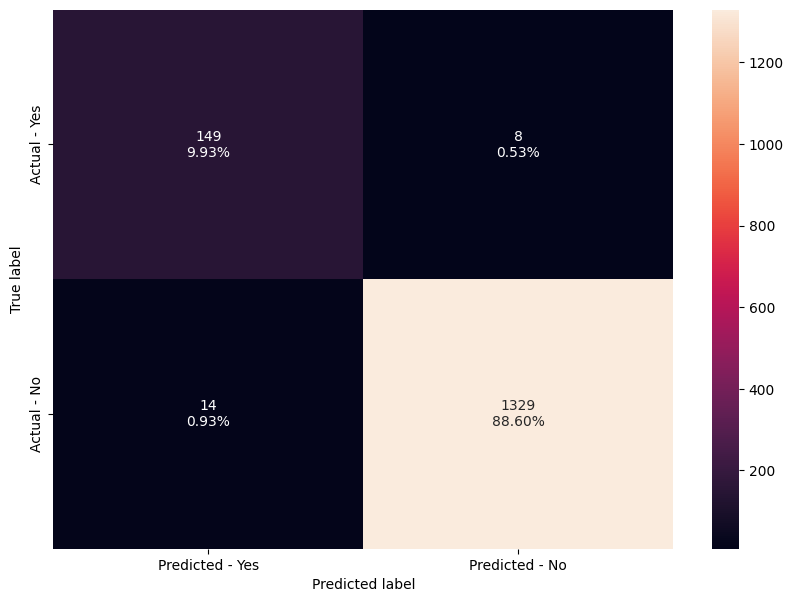

In [ ]:
#  improve the model performance

# Handling Class Imbalance using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Building a Decision Tree Model on Resampled Data
dtree_resampled = DecisionTreeClassifier(random_state=42)
dtree_resampled.fit(X_train_resampled, y_train_resampled)

# Evaluating the Decision Tree Model on Resampled Data
get_metrics_score(dtree_resampled)
make_confusion_matrix(dtree_resampled, y_test)

# Hyperparameter Tuning for Decision Tree on Resampled Data
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_resampled = GridSearchCV(estimator=dtree_resampled, param_grid=param_grid, cv=5, scoring='f1')
grid_search_resampled.fit(X_train_resampled, y_train_resampled)

# Best Parameters and Best Model for Resampled Data
print("Best Parameters (Resampled):", grid_search_resampled.best_params_)
best_dtree_resampled = grid_search_resampled.best_estimator_

# Evaluating the Tuned Decision Tree Model on Resampled Data
get_metrics_score(best_dtree_resampled)
make_confusion_matrix(best_dtree_resampled, y_test)


In [ ]:
#Check performance on training data

#check the model performance on training data
get_metrics_score(best_dtree_resampled, flag=True)


Accuracy on training set :  1.0
Accuracy on test set :  0.9853333333333333
Recall on training set :  1.0
Recall on test set :  0.9490445859872612
Precision on training set :  1.0
Precision on test set :  0.9141104294478528
F1 on training set :  1.0
F1 on test set :  0.9312500000000001


[1.0,
 0.9853333333333333,
 1.0,
 0.9490445859872612,
 1.0,
 0.9141104294478528,
 1.0,
 0.9312500000000001]

In [ ]:
#Checking performance on test data

#check the model performance on test data
get_metrics_score(best_dtree_resampled, flag=False)


[1.0,
 0.9853333333333333,
 1.0,
 0.9490445859872612,
 1.0,
 0.9141104294478528,
 1.0,
 0.9312500000000001]

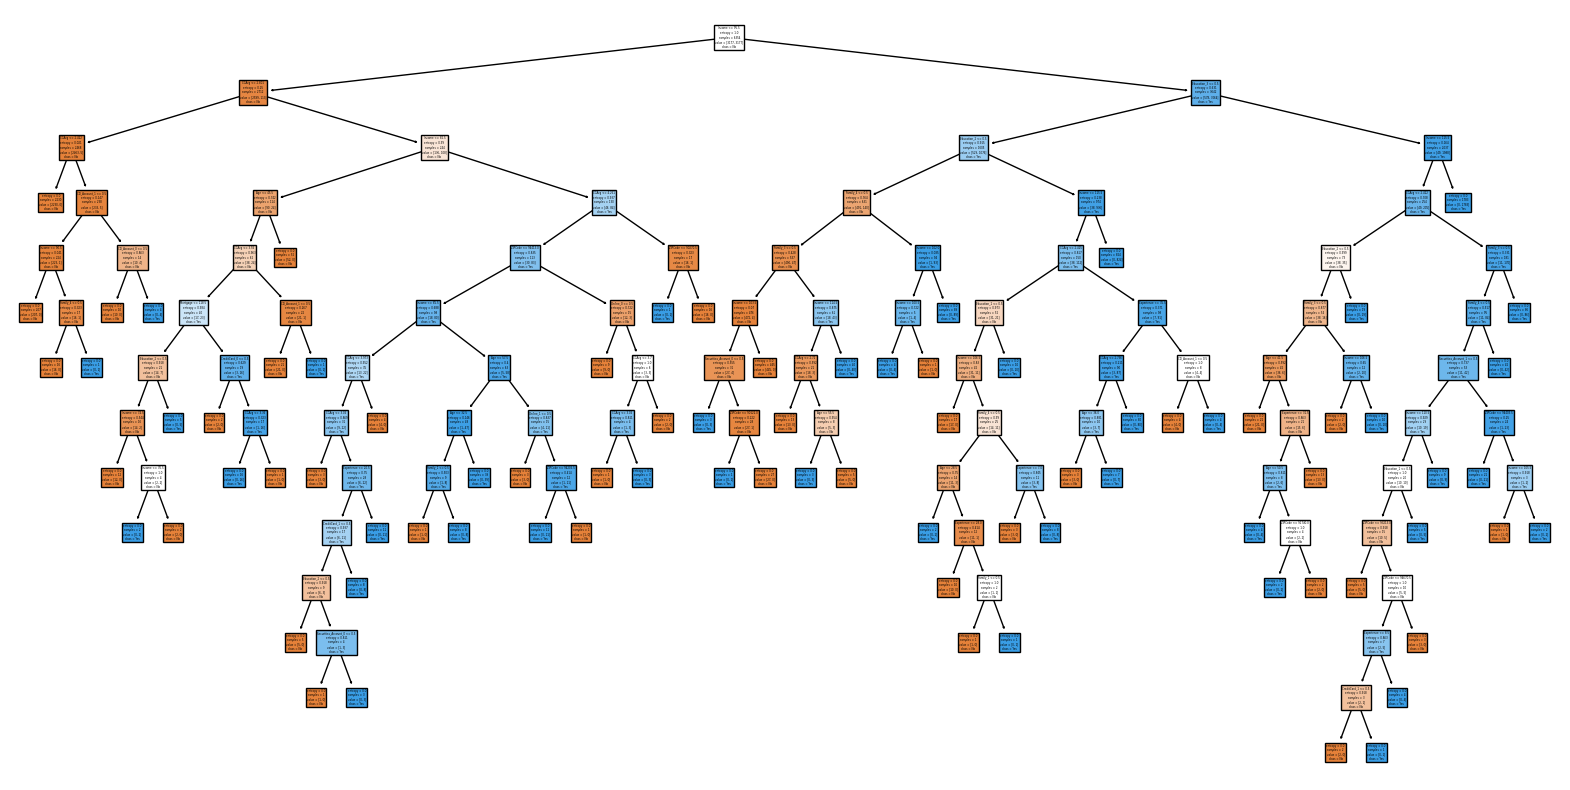

In [ ]:
# Visualizing the Decision Tree

plt.figure(figsize=(20, 10))
tree.plot_tree(best_dtree_resampled, feature_names=X_train_resampled.columns,
               class_names=['No', 'Yes'], filled=True)
plt.show()


## Model Comparison and Final Model Selection

In [ ]:
# compare the models  performance and make a final selection

# Create a list to store the results of different models
results = []

# Decision Tree - Original Data
dtree_scores = get_metrics_score(best_dtree, flag=True)
results.append(['Decision Tree - Original', dtree_scores[1], dtree_scores[3],
                dtree_scores[5], dtree_scores[7]])

# Decision Tree - Resampled Data
dtree_resampled_scores = get_metrics_score(best_dtree_resampled, flag=False)
results.append(['Decision Tree - Resampled', dtree_resampled_scores[1],
                dtree_resampled_scores[3], dtree_resampled_scores[5],
                dtree_resampled_scores[7]])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1-Score'])

# Print the results DataFrame
print(results_df)

# Select the final model based on the comparison
# In this case, let's assume Decision Tree - Resampled performed better
final_model = best_dtree_resampled


Accuracy on training set :  0.9857142857142858
Accuracy on test set :  0.9826666666666667
Recall on training set :  0.8513931888544891
Recall on test set :  0.8726114649681529
Precision on training set :  0.9927797833935018
Precision on test set :  0.958041958041958
F1 on training set :  0.9166666666666666
F1 on test set :  0.9133333333333333
                       Model  Accuracy    Recall  Precision  F1-Score
0   Decision Tree - Original  0.982667  0.872611   0.958042  0.913333
1  Decision Tree - Resampled  0.985333  0.949045   0.914110  0.931250


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

In [ ]:


# Based on the analysis and modeling, here are some recommendations for the bank:

# 1. Target Customers with Higher Education:
# - The analysis clearly shows a strong correlation between education level and personal loan uptake.
# - Focus marketing efforts on customers with advanced/professional degrees, as they are significantly more likely to be interested in loans.
# - Consider tailored campaigns and offers for this segment.

# 2. Leverage Income and Credit Card Spending:
# - Higher income and credit card spending are also strong indicators of loan interest.
# - Develop targeted strategies for customers with higher incomes and credit card usage, offering them personalized loan options.

# 3. Explore CD Account Holders:
# - Customers with CD accounts show a higher propensity for personal loans.
# - Leverage this existing relationship to promote loan products to CD account holders.

# 4. Address Class Imbalance:
# - The dataset has a significant class imbalance, with fewer customers accepting personal loans.
# - Continue exploring techniques like SMOTE to handle this imbalance and improve model performance.

# 5. Further Feature Engineering:
# - Investigate the possibility of creating new features based on existing ones to potentially improve model accuracy.

# 6. Continuous Monitoring and Optimization:
# - Regularly monitor model performance and retrain it as new data becomes available.
# - Stay updated on market trends and customer preferences to adapt strategies accordingly.

# 7. Personalized Communication:
# - Use customer segmentation and insights to personalize communication and offers, increasing the relevance and effectiveness of marketing campaigns.

# 8. Risk Assessment and Management:
# - While targeting high-potential customers, ensure robust risk assessment and management practices to mitigate potential defaults.

# By implementing these recommendations, the bank can optimize its marketing strategies, improve loan uptake, and enhance overall business performance.


___